# Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:
--> Which variables are significant in predicting the price of a house, and
--> How well those variables describe the price of a house.
--> Also, determine the optimal value of lambda for ridge and lasso regression.

# Bussiness Goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Approach:
Build a regression model using Advance regression methods like Ridge and Lasso regression to predict the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Note: Install category enconder in case of not exist on system
#install it 
# pip install category_encoders

In [2]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import category_encoders as ce

In [3]:
# Load data from csv
house_data = pd.read_csv("D:\\Documents\\UpgradeAIML\\module 4\\Assignment\\train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#get shape of dataframe
house_data.shape

(1460, 81)

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#cheked any null column exist or not
nuni = house_data.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [7]:
#Drop columns with maximum missing values
house_data = house_data.drop(columns=['Alley','PoolQC','Fence', 'MiscFeature'])

In [8]:
#check unique values of FireplaceQu 
house_data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [9]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

In [10]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [11]:
#check unique values of LotFrontage
house_data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [12]:
#check median of LotFrontage
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median

69.0

In [13]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

In [14]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())    

In [15]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [16]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [17]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [18]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No')

In [19]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [20]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [21]:
#impute missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])    

In [22]:
#replace Nan values of GarageType with NA i.e. No Garage
house_data.GarageType = house_data.GarageType.fillna('NA')

In [23]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)

In [24]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [25]:
#replace Nan values of GarageQual with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [26]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [27]:
#replace Nan values of GarageCond with NA i.e. No Garage
house_data.GarageCond = house_data.GarageCond.fillna('NA')

In [28]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

Series([], dtype: int64)

In [29]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt

In [30]:
#Drop YrSold, YearBuilt after HouseAge
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

In [31]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [32]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [33]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [34]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data = house_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [35]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [36]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [37]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [38]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [39]:
house_data.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [40]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [41]:
for c in house_data.columns:
    if house_data[c].dtype == np.object :
        print(c)
        print(house_data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [42]:
#Drop columns which have moe than 80% bias data
house_data=house_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [43]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [44]:
#Get all object type columns
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


# Create Dummy Varibales

In [45]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(house_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
house_data = pd.concat([house_data,MSSubClass_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [46]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [47]:
#concat MSZoning_df with main house_data df
house_data = pd.concat([house_data,MSZoning_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [48]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')

In [49]:
#concat LotShape_df with main house_data df
house_data = pd.concat([house_data,LotShape_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [50]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')

In [51]:
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,LotConfig_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [52]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,Neighborhood_df],axis=1)
house_data.head()

#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['Neighborhood'],return_df=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [53]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
house_data = pd.concat([house_data,HouseStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [54]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
house_data = pd.concat([house_data,RoofStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [55]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
house_data = pd.concat([house_data,Exterior1st_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [56]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
house_data = pd.concat([house_data,Exterior2nd_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0

In [57]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
house_data = pd.concat([house_data,MasVnrType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.

In [58]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
house_data = pd.concat([house_data,Foundation_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8

In [59]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
house_data = pd.concat([house_data,GarageType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [60]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
house_data = pd.concat([house_data,GarageFinish_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [61]:
house_data.shape

(1460, 162)

In [62]:
#Drop categorical variables after ceating dummy varaibles
house_data=house_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [63]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int64(39), uint8(107)
memory usage: 631.7 KB


# Prepairing Data For Modeling

In [64]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [65]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,102

# Rescalling The Numeric Factors

In [66]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.175567,-1.257424,-0.154845,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,0.741868,-0.937484,-0.927153,-0.985354,0.179549,-1.034916,-1.023035,2.422143,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.10

In [67]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00000

# Training The Model

In [68]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [69]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

# RFE- Recursive Feature Elimination
___Take Top 35 Features from RFE___

In [70]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 35)

rfe = rfe.fit(X_train,y_train)

In [71]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 4),
 ('LotArea', False, 4),
 ('OverallQual', True, 1),
 ('OverallCond', False, 4),
 ('YearRemodAdd', False, 4),
 ('MasVnrArea', False, 3),
 ('ExterQual', False, 4),
 ('BsmtQual', False, 2),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 4),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 4),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 4),
 ('BsmtHalfBath', False, 4),
 ('FullBath', False, 4),
 ('HalfBath', False, 4),
 ('BedroomAbvGr', False, 4),
 ('KitchenAbvGr', False, 4),
 ('KitchenQual', False, 4),
 ('TotRmsAbvGrd', False, 4),
 ('Fireplaces', False, 3),
 ('FireplaceQu', False, 3),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 4),
 ('GarageArea', False, 3),
 ('WoodDeckSF', False, 4),
 ('OpenPorchSF', False, 4),
 ('EnclosedPorch', False, 4),
 ('3SsnPorch', False, 4),
 ('ScreenPorch', False, 4),


In [72]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterio

In [73]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_80', 'MSSubClass_85', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Timber',
       'HouseStyle

# Building model using statsmodel, for the detailed statistics

In [74]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [75]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [76]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [77]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     76.36
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:38   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     952   BIC:                         2.450e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.779e+04   1.86e+04      4.177      0.000    4.12e+04    1.14e+05
OverallQual           2.224e+04   1903.678     11.682      0.000    1.85e+04     2.6e+04
BsmtExposure          1.196e+04   1275.668      9.376      0.000    9457.839    1.45e+04
BsmtFinSF1            4291.7617   1006.830      4.263      0.000    2315.899    6267.624
BsmtFinSF2              -3.2098   1059.355     -0.003      0.998   -2082.152    2075.732
BsmtUnfSF            -2644.1890   1033.917     -2.557      0.011   -4673.208    -615.170
TotalBsmtSF           1762.2895   1617.413      1.090      0.276   -1411.817    4936.396
1stFlrSF              6387.8203   1999.407      3.195      0.001    2464.067    1.03e+04
2ndFlrSF              1.819e+04   2042.818      8.902      0.000    1.42e+04    2.22e+04
LowQualFinSF          -877.1098   1201.916     -0.730      0.466   -3235.821    1481.602
GrLivArea             1.959e+04   1217.941     16.085      0.000    1.72e+04     2.2e+04
GarageYrBlt           1.258e+05   3.04e+04      4.142      0.000    6.62e+04    1.85e+05
MSSubClass_45        -1.611e+04   2.53e+04     -0.636      0.525   -6.58e+04    3.36e+04
MSSubClass_75         8684.2936   2.03e+04      0.428      0.669   -3.11e+04    4.85e+04
MSSubClass_90        -2.506e+04   5981.849     -4.190      0.000   -3.68e+04   -1.33e+04
MSSubClass_120       -2.735e+04   5077.146     -5.387      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.565e+04   6584.726     -3.896      0.000   -3.86e+04   -1.27e+04
MSSubClass_180       -1.885e+04   1.49e+04     -1.261      0.208   -4.82e+04    1.05e+04
MSSubClass_190       -1.705e+04   7216.346     -2.362      0.018   -3.12e+04   -2883.286
MSZoning_FV           2.292e+04   1.67e+04      1.374      0.170   -9816.905    5.57e+04
MSZoning_RH           2.867e+04   1.58e+04      1.817      0.070   -2293.972    5.96e+04
MSZoning_RL           3.418e+04   1.31e+04      2.607      0.009    8450.519    5.99e+04
MSZoning_RM           2.881e+04   1.32e+04      2.176      0.030    2831.155    5.48e+04
LotConfig_CulDSac     1.124e+04   4358.781      2.578      0.010    2683.058    1.98e+04
LotConfig_FR2        -1.156e+04   6117.326     -1.889      0.059   -2.36e+04     449.814
Neighborhood_ClearCr  1.553e+04   7956.402      1.952      0.051     -86.551    3.11e+04
Neighborhood_Crawfor  3.467e+04   6317.989      5.487      0.000    2.23e+04    4.71e+04
Neighborhood_Edwards -1.408e+04   4322.493     -3.256      0.001   -2.26e+04   -5592.407
Neighborhood_NPkVill  1.631e+04   1.99e+04      0.820      0.412   -2.27e+04    5.53e+04
Neighborhood_NoRidge  5.753e+04   6505.115      8.844      0.000    4.48e+04    7.03e+04
Neighborhood_NridgHt  6.374e+04   5455.924     11.683      0.000     5.3e+04    7.45e+04
Neighborhood_Somerst  3.844e+04   9368.802      4.103    

In [78]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
74,GarageFinish_NA,inf
43,Exterior1st_AsphShn,inf
73,GarageType_NA,inf
3,BsmtFinSF1,inf
4,BsmtFinSF2,inf
...,...,...
42,RoofStyle_Shed,1.09
39,RoofStyle_Gambrel,1.09
24,LotConfig_FR2,1.08
72,Foundation_Wood,1.02


In [79]:
# BsmtFinSF2 has higher p-value. Lets drop it.___
X_train_new = X_train_rfe.drop(['BsmtFinSF2'],axis=1)

In [80]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'MSSubClass_45', 'MSSubClass_75', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_CulDSac', 'LotConfig_FR2', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone',
       'Exterior1st_

In [81]:
X_train_lm = sm.add_constant(X_train_new)

In [82]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [83]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     76.36
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:38   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     952   BIC:                         2.450e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.779e+04   1.86e+04      4.177      0.000    4.12e+04    1.14e+05
OverallQual           2.224e+04   1903.678     11.682      0.000    1.85e+04     2.6e+04
BsmtExposure          1.196e+04   1275.668      9.376      0.000    9457.839    1.45e+04
BsmtFinSF1            4300.5001   3066.875      1.402      0.161   -1718.116    1.03e+04
BsmtUnfSF            -2635.7583   2933.502     -0.899      0.369   -8392.635    3121.118
TotalBsmtSF           1753.6642   3618.706      0.485      0.628   -5347.898    8855.226
1stFlrSF              6387.8203   1999.407      3.195      0.001    2464.067    1.03e+04
2ndFlrSF              1.819e+04   2042.818      8.902      0.000    1.42e+04    2.22e+04
LowQualFinSF          -877.1098   1201.916     -0.730      0.466   -3235.821    1481.602
GrLivArea             1.959e+04   1217.941     16.085      0.000    1.72e+04     2.2e+04
GarageYrBlt           1.258e+05   3.04e+04      4.142      0.000    6.62e+04    1.85e+05
MSSubClass_45        -1.611e+04   2.53e+04     -0.636      0.525   -6.58e+04    3.36e+04
MSSubClass_75         8684.2936   2.03e+04      0.428      0.669   -3.11e+04    4.85e+04
MSSubClass_90        -2.506e+04   5981.849     -4.190      0.000   -3.68e+04   -1.33e+04
MSSubClass_120       -2.735e+04   5077.146     -5.387      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.565e+04   6584.726     -3.896      0.000   -3.86e+04   -1.27e+04
MSSubClass_180       -1.885e+04   1.49e+04     -1.261      0.208   -4.82e+04    1.05e+04
MSSubClass_190       -1.705e+04   7216.346     -2.362      0.018   -3.12e+04   -2883.286
MSZoning_FV           2.292e+04   1.67e+04      1.374      0.170   -9816.905    5.57e+04
MSZoning_RH           2.867e+04   1.58e+04      1.817      0.070   -2293.972    5.96e+04
MSZoning_RL           3.418e+04   1.31e+04      2.607      0.009    8450.519    5.99e+04
MSZoning_RM           2.881e+04   1.32e+04      2.176      0.030    2831.155    5.48e+04
LotConfig_CulDSac     1.124e+04   4358.781      2.578      0.010    2683.058    1.98e+04
LotConfig_FR2        -1.156e+04   6117.326     -1.889      0.059   -2.36e+04     449.814
Neighborhood_ClearCr  1.553e+04   7956.402      1.952      0.051     -86.551    3.11e+04
Neighborhood_Crawfor  3.467e+04   6317.989      5.487      0.000    2.23e+04    4.71e+04
Neighborhood_Edwards -1.408e+04   4322.493     -3.256      0.001   -2.26e+04   -5592.407
Neighborhood_NPkVill  1.631e+04   1.99e+04      0.820      0.412   -2.27e+04    5.53e+04
Neighborhood_NoRidge  5.753e+04   6505.115      8.844      0.000    4.48e+04    7.03e+04
Neighborhood_NridgHt  6.374e+04   5455.924     11.683      0.000     5.3e+04    7.45e+04
Neighborhood_Somerst  3.844e+04   9368.802      4.103      0.000    2.01e+04    5.68e+04
Neighborhood_StoneBr  4.134e+04   9965.286      4.148    

In [84]:
X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)

In [85]:
X_train_lm = sm.add_constant(X_train_new)

In [86]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [87]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     76.36
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:38   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     952   BIC:                         2.450e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.779e+04   1.86e+04      4.177      0.000    4.12e+04    1.14e+05
OverallQual           2.224e+04   1903.678     11.682      0.000    1.85e+04     2.6e+04
BsmtExposure          1.196e+04   1275.668      9.376      0.000    9457.839    1.45e+04
BsmtFinSF1            4300.5001   3066.875      1.402      0.161   -1718.116    1.03e+04
BsmtUnfSF            -2635.7583   2933.502     -0.899      0.369   -8392.635    3121.118
TotalBsmtSF           1753.6642   3618.706      0.485      0.628   -5347.898    8855.226
1stFlrSF              6387.8203   1999.407      3.195      0.001    2464.067    1.03e+04
2ndFlrSF              1.819e+04   2042.818      8.902      0.000    1.42e+04    2.22e+04
LowQualFinSF          -877.1098   1201.916     -0.730      0.466   -3235.821    1481.602
GrLivArea             1.959e+04   1217.941     16.085      0.000    1.72e+04     2.2e+04
GarageYrBlt           1.258e+05   3.04e+04      4.142      0.000    6.62e+04    1.85e+05
MSSubClass_45        -1.611e+04   2.53e+04     -0.636      0.525   -6.58e+04    3.36e+04
MSSubClass_75         8684.2936   2.03e+04      0.428      0.669   -3.11e+04    4.85e+04
MSSubClass_90        -2.506e+04   5981.849     -4.190      0.000   -3.68e+04   -1.33e+04
MSSubClass_120       -2.735e+04   5077.146     -5.387      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.565e+04   6584.726     -3.896      0.000   -3.86e+04   -1.27e+04
MSSubClass_180       -1.885e+04   1.49e+04     -1.261      0.208   -4.82e+04    1.05e+04
MSSubClass_190       -1.705e+04   7216.346     -2.362      0.018   -3.12e+04   -2883.286
MSZoning_FV           2.292e+04   1.67e+04      1.374      0.170   -9816.905    5.57e+04
MSZoning_RH           2.867e+04   1.58e+04      1.817      0.070   -2293.972    5.96e+04
MSZoning_RL           3.418e+04   1.31e+04      2.607      0.009    8450.519    5.99e+04
MSZoning_RM           2.881e+04   1.32e+04      2.176      0.030    2831.155    5.48e+04
LotConfig_CulDSac     1.124e+04   4358.781      2.578      0.010    2683.058    1.98e+04
LotConfig_FR2        -1.156e+04   6117.326     -1.889      0.059   -2.36e+04     449.814
Neighborhood_ClearCr  1.553e+04   7956.402      1.952      0.051     -86.551    3.11e+04
Neighborhood_Crawfor  3.467e+04   6317.989      5.487      0.000    2.23e+04    4.71e+04
Neighborhood_Edwards -1.408e+04   4322.493     -3.256      0.001   -2.26e+04   -5592.407
Neighborhood_NPkVill  1.631e+04   1.99e+04      0.820      0.412   -2.27e+04    5.53e+04
Neighborhood_NoRidge  5.753e+04   6505.115      8.844      0.000    4.48e+04    7.03e+04
Neighborhood_NridgHt  6.374e+04   5455.924     11.683      0.000     5.3e+04    7.45e+04
Neighborhood_Somerst  3.844e+04   9368.802      4.103      0.000    2.01e+04    5.68e+04
Neighborhood_StoneBr  4.134e+04   9965.286      4.148    

In [88]:
#___Exterior2nd_CBlock has higher p-value. Lets drop it.___ 
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)

In [89]:
#___Rebuild the model without Exterior2nd_CBlock___ 
X_train_lm = sm.add_constant(X_train_new)

In [90]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [91]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     77.58
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:38   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     953   BIC:                         2.449e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.775e+04   1.86e+04      4.178      0.000    4.12e+04    1.14e+05
OverallQual           2.225e+04   1898.647     11.720      0.000    1.85e+04     2.6e+04
BsmtExposure          1.196e+04   1274.966      9.382      0.000    9460.229    1.45e+04
BsmtFinSF1            4304.1838   3065.065      1.404      0.161   -1710.873    1.03e+04
BsmtUnfSF            -2631.8475   2931.723     -0.898      0.370   -8385.226    3121.531
TotalBsmtSF           1741.5802   3614.854      0.482      0.630   -5352.414    8835.574
1stFlrSF              6394.9311   1997.132      3.202      0.001    2475.646    1.03e+04
2ndFlrSF              1.818e+04   2039.642      8.911      0.000    1.42e+04    2.22e+04
LowQualFinSF          -876.9185   1201.291     -0.730      0.466   -3234.399    1480.562
GrLivArea             1.959e+04   1217.085     16.094      0.000    1.72e+04     2.2e+04
GarageYrBlt           1.257e+05   3.03e+04      4.143      0.000    6.61e+04    1.85e+05
MSSubClass_45        -1.612e+04   2.53e+04     -0.637      0.524   -6.58e+04    3.36e+04
MSSubClass_75         8708.6836   2.03e+04      0.430      0.668   -3.11e+04    4.85e+04
MSSubClass_90        -2.506e+04   5978.660     -4.191      0.000   -3.68e+04   -1.33e+04
MSSubClass_120       -2.736e+04   5074.157     -5.391      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.566e+04   6580.385     -3.900      0.000   -3.86e+04   -1.27e+04
MSSubClass_180       -1.884e+04   1.49e+04     -1.261      0.208   -4.82e+04    1.05e+04
MSSubClass_190       -1.704e+04   7212.593     -2.363      0.018   -3.12e+04   -2889.795
MSZoning_FV           2.289e+04   1.67e+04      1.373      0.170   -9823.401    5.56e+04
MSZoning_RH           2.864e+04   1.58e+04      1.816      0.070   -2302.802    5.96e+04
MSZoning_RL           3.415e+04   1.31e+04      2.607      0.009    8438.605    5.99e+04
MSZoning_RM           2.879e+04   1.32e+04      2.176      0.030    2829.177    5.48e+04
LotConfig_CulDSac     1.124e+04   4356.511      2.580      0.010    2688.262    1.98e+04
LotConfig_FR2        -1.155e+04   6114.105     -1.890      0.059   -2.36e+04     445.789
Neighborhood_ClearCr  1.554e+04   7951.674      1.954      0.051     -67.402    3.11e+04
Neighborhood_Crawfor  3.468e+04   6313.981      5.492      0.000    2.23e+04    4.71e+04
Neighborhood_Edwards -1.406e+04   4317.537     -3.256      0.001   -2.25e+04   -5586.660
Neighborhood_NPkVill  1.632e+04   1.99e+04      0.821      0.412   -2.27e+04    5.53e+04
Neighborhood_NoRidge  5.753e+04   6501.736      8.848      0.000    4.48e+04    7.03e+04
Neighborhood_NridgHt  6.374e+04   5453.054     11.689      0.000     5.3e+04    7.44e+04
Neighborhood_Somerst  3.844e+04   9363.891      4.105      0.000    2.01e+04    5.68e+04
Neighborhood_StoneBr  4.133e+04   9959.994      4.150    

In [92]:
# RoofStyle_Mansard has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['RoofStyle_Mansard'],axis=1)

In [93]:
# ___Rebuild the model without RoofStyle_Mansard _
X_train_lm = sm.add_constant(X_train_new)

In [94]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [95]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     78.84
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:39   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     954   BIC:                         2.449e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.775e+04   1.86e+04      4.180      0.000    4.13e+04    1.14e+05
OverallQual           2.225e+04   1897.643     11.726      0.000    1.85e+04     2.6e+04
BsmtExposure          1.196e+04   1274.301      9.387      0.000    9461.301    1.45e+04
BsmtFinSF1            4303.9157   3063.471      1.405      0.160   -1708.005    1.03e+04
BsmtUnfSF            -2629.9299   2930.127     -0.898      0.370   -8380.168    3120.308
TotalBsmtSF           1730.6832   3611.072      0.479      0.632   -5355.878    8817.244
1stFlrSF              6400.4316   1995.216      3.208      0.001    2484.912    1.03e+04
2ndFlrSF              1.818e+04   2037.288      8.925      0.000    1.42e+04    2.22e+04
LowQualFinSF          -878.6892   1200.515     -0.732      0.464   -3234.644    1477.266
GrLivArea              1.96e+04   1212.165     16.167      0.000    1.72e+04     2.2e+04
GarageYrBlt           1.256e+05   3.03e+04      4.144      0.000    6.61e+04    1.85e+05
MSSubClass_45        -1.614e+04   2.53e+04     -0.638      0.524   -6.58e+04    3.35e+04
MSSubClass_75         8660.6711   2.03e+04      0.427      0.669   -3.11e+04    4.84e+04
MSSubClass_90        -2.504e+04   5972.895     -4.193      0.000   -3.68e+04   -1.33e+04
MSSubClass_120       -2.735e+04   5071.094     -5.394      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.567e+04   6576.911     -3.902      0.000   -3.86e+04   -1.28e+04
MSSubClass_180       -1.883e+04   1.49e+04     -1.261      0.208   -4.81e+04    1.05e+04
MSSubClass_190       -1.708e+04   7200.319     -2.372      0.018   -3.12e+04   -2946.468
MSZoning_FV            2.29e+04   1.67e+04      1.374      0.170   -9805.421    5.56e+04
MSZoning_RH           2.864e+04   1.58e+04      1.817      0.070   -2291.948    5.96e+04
MSZoning_RL           3.416e+04   1.31e+04      2.608      0.009    8458.266    5.99e+04
MSZoning_RM            2.88e+04   1.32e+04      2.178      0.030    2852.663    5.47e+04
LotConfig_CulDSac     1.123e+04   4354.122      2.580      0.010    2689.894    1.98e+04
LotConfig_FR2        -1.155e+04   6110.926     -1.891      0.059   -2.35e+04     439.062
Neighborhood_ClearCr  1.552e+04   7945.501      1.953      0.051     -71.998    3.11e+04
Neighborhood_Crawfor  3.466e+04   6306.303      5.495      0.000    2.23e+04     4.7e+04
Neighborhood_Edwards -1.408e+04   4311.099     -3.265      0.001   -2.25e+04   -5616.978
Neighborhood_NPkVill  1.632e+04   1.99e+04      0.822      0.412   -2.27e+04    5.53e+04
Neighborhood_NoRidge   5.75e+04   6492.612      8.857      0.000    4.48e+04    7.02e+04
Neighborhood_NridgHt  6.374e+04   5450.012     11.695      0.000     5.3e+04    7.44e+04
Neighborhood_Somerst  3.844e+04   9359.023      4.107      0.000    2.01e+04    5.68e+04
Neighborhood_StoneBr  4.133e+04   9954.688      4.152    

In [96]:
#TotalBsmtSF has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['TotalBsmtSF'],axis=1)

In [97]:
# ___Rebuild the model without TotalBsmtSF
X_train_lm = sm.add_constant(X_train_new)

In [98]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [99]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     80.11
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:39   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     955   BIC:                         2.448e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.772e+04   1.86e+04      4.181      0.000    4.12e+04    1.14e+05
OverallQual            2.23e+04   1894.514     11.769      0.000    1.86e+04     2.6e+04
BsmtExposure          1.204e+04   1263.165      9.532      0.000    9561.869    1.45e+04
BsmtFinSF1            5394.7620   2049.647      2.632      0.009    1372.430    9417.094
BsmtUnfSF            -1608.0660   2009.092     -0.800      0.424   -5550.811    2334.679
1stFlrSF              6798.8841   1813.024      3.750      0.000    3240.913    1.04e+04
2ndFlrSF              1.803e+04   2012.440      8.961      0.000    1.41e+04     2.2e+04
LowQualFinSF          -855.1218   1199.024     -0.713      0.476   -3208.147    1497.903
GrLivArea             1.977e+04   1153.548     17.143      0.000    1.75e+04     2.2e+04
GarageYrBlt           1.251e+05   3.03e+04      4.132      0.000    6.57e+04    1.85e+05
MSSubClass_45        -1.626e+04   2.53e+04     -0.643      0.520   -6.59e+04    3.34e+04
MSSubClass_75         8715.3950   2.03e+04      0.430      0.667    -3.1e+04    4.85e+04
MSSubClass_90        -2.512e+04   5968.306     -4.209      0.000   -3.68e+04   -1.34e+04
MSSubClass_120       -2.738e+04   5068.601     -5.403      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.559e+04   6572.440     -3.894      0.000   -3.85e+04   -1.27e+04
MSSubClass_180       -1.856e+04   1.49e+04     -1.244      0.214   -4.78e+04    1.07e+04
MSSubClass_190       -1.732e+04   7178.775     -2.413      0.016   -3.14e+04   -3236.957
MSZoning_FV           2.299e+04   1.67e+04      1.380      0.168   -9693.114    5.57e+04
MSZoning_RH           2.869e+04   1.58e+04      1.821      0.069   -2228.129    5.96e+04
MSZoning_RL           3.432e+04   1.31e+04      2.623      0.009    8638.452       6e+04
MSZoning_RM           2.893e+04   1.32e+04      2.190      0.029    3000.267    5.49e+04
LotConfig_CulDSac     1.121e+04   4352.108      2.576      0.010    2671.161    1.98e+04
LotConfig_FR2        -1.152e+04   6107.987     -1.886      0.060   -2.35e+04     469.747
Neighborhood_ClearCr  1.584e+04   7914.000      2.002      0.046     311.001    3.14e+04
Neighborhood_Crawfor  3.449e+04   6294.877      5.480      0.000    2.21e+04    4.68e+04
Neighborhood_Edwards -1.413e+04   4308.150     -3.279      0.001   -2.26e+04   -5671.745
Neighborhood_NPkVill  1.638e+04   1.99e+04      0.825      0.410   -2.26e+04    5.54e+04
Neighborhood_NoRidge  5.747e+04   6489.682      8.856      0.000    4.47e+04    7.02e+04
Neighborhood_NridgHt   6.38e+04   5446.252     11.714      0.000    5.31e+04    7.45e+04
Neighborhood_Somerst  3.848e+04   9354.728      4.114      0.000    2.01e+04    5.68e+04
Neighborhood_StoneBr  4.146e+04   9947.048      4.168      0.000    2.19e+04     6.1e+04
Neighborhood_Veenker  3.293e+04   1.06e+04      3.110    

In [100]:
X_train_new.shape

(1021, 70)

In [101]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
69,GarageFinish_NA,inf
68,GarageType_NA,inf
50,Exterior2nd_AsphShn,inf
40,Exterior1st_AsphShn,inf
5,1stFlrSF,inf
...,...,...
37,RoofStyle_Gambrel,1.09
39,RoofStyle_Shed,1.09
22,LotConfig_FR2,1.08
67,Foundation_Wood,1.02


In [102]:
#Exterior2nd_Other has higher p-value and VIF. Lets drop it.___
X_train_new = X_train_new.drop(['Exterior2nd_Other'],axis=1)

In [103]:
#___Rebuild the model without Exterior2nd_Other
X_train_lm = sm.add_constant(X_train_new)

In [104]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [105]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     80.11
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:39   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     955   BIC:                         2.448e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.772e+04   1.86e+04      4.181      0.000    4.12e+04    1.14e+05
OverallQual            2.23e+04   1894.514     11.769      0.000    1.86e+04     2.6e+04
BsmtExposure          1.204e+04   1263.165      9.532      0.000    9561.869    1.45e+04
BsmtFinSF1            5394.7620   2049.647      2.632      0.009    1372.430    9417.094
BsmtUnfSF            -1608.0660   2009.092     -0.800      0.424   -5550.811    2334.679
1stFlrSF              6798.8841   1813.024      3.750      0.000    3240.913    1.04e+04
2ndFlrSF              1.803e+04   2012.440      8.961      0.000    1.41e+04     2.2e+04
LowQualFinSF          -855.1218   1199.024     -0.713      0.476   -3208.147    1497.903
GrLivArea             1.977e+04   1153.548     17.143      0.000    1.75e+04     2.2e+04
GarageYrBlt           1.251e+05   3.03e+04      4.132      0.000    6.57e+04    1.85e+05
MSSubClass_45        -1.626e+04   2.53e+04     -0.643      0.520   -6.59e+04    3.34e+04
MSSubClass_75         8715.3950   2.03e+04      0.430      0.667    -3.1e+04    4.85e+04
MSSubClass_90        -2.512e+04   5968.306     -4.209      0.000   -3.68e+04   -1.34e+04
MSSubClass_120       -2.738e+04   5068.601     -5.403      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.559e+04   6572.440     -3.894      0.000   -3.85e+04   -1.27e+04
MSSubClass_180       -1.856e+04   1.49e+04     -1.244      0.214   -4.78e+04    1.07e+04
MSSubClass_190       -1.732e+04   7178.775     -2.413      0.016   -3.14e+04   -3236.957
MSZoning_FV           2.299e+04   1.67e+04      1.380      0.168   -9693.114    5.57e+04
MSZoning_RH           2.869e+04   1.58e+04      1.821      0.069   -2228.129    5.96e+04
MSZoning_RL           3.432e+04   1.31e+04      2.623      0.009    8638.452       6e+04
MSZoning_RM           2.893e+04   1.32e+04      2.190      0.029    3000.267    5.49e+04
LotConfig_CulDSac     1.121e+04   4352.108      2.576      0.010    2671.161    1.98e+04
LotConfig_FR2        -1.152e+04   6107.987     -1.886      0.060   -2.35e+04     469.747
Neighborhood_ClearCr  1.584e+04   7914.000      2.002      0.046     311.001    3.14e+04
Neighborhood_Crawfor  3.449e+04   6294.877      5.480      0.000    2.21e+04    4.68e+04
Neighborhood_Edwards -1.413e+04   4308.150     -3.279      0.001   -2.26e+04   -5671.745
Neighborhood_NPkVill  1.638e+04   1.99e+04      0.825      0.410   -2.26e+04    5.54e+04
Neighborhood_NoRidge  5.747e+04   6489.682      8.856      0.000    4.47e+04    7.02e+04
Neighborhood_NridgHt   6.38e+04   5446.252     11.714      0.000    5.31e+04    7.45e+04
Neighborhood_Somerst  3.848e+04   9354.728      4.114      0.000    2.01e+04    5.68e+04
Neighborhood_StoneBr  4.146e+04   9947.048      4.168      0.000    2.19e+04     6.1e+04
Neighborhood_Veenker  3.293e+04   1.06e+04      3.110    

In [106]:
#Exterior1st_AsphShn has higher p-value and VIF. Lets drop it.___ 
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

In [107]:
# ___Rebuild the model without Exterior1st_AsphShn
X_train_lm = sm.add_constant(X_train_new)

In [108]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [109]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     80.11
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:39   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     955   BIC:                         2.448e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.772e+04   1.86e+04      4.181      0.000    4.12e+04    1.14e+05
OverallQual            2.23e+04   1894.514     11.769      0.000    1.86e+04     2.6e+04
BsmtExposure          1.204e+04   1263.165      9.532      0.000    9561.869    1.45e+04
BsmtFinSF1            5394.7620   2049.647      2.632      0.009    1372.430    9417.094
BsmtUnfSF            -1608.0660   2009.092     -0.800      0.424   -5550.811    2334.679
1stFlrSF              6798.8841   1813.024      3.750      0.000    3240.913    1.04e+04
2ndFlrSF              1.803e+04   2012.440      8.961      0.000    1.41e+04     2.2e+04
LowQualFinSF          -855.1218   1199.024     -0.713      0.476   -3208.147    1497.903
GrLivArea             1.977e+04   1153.548     17.143      0.000    1.75e+04     2.2e+04
GarageYrBlt           1.251e+05   3.03e+04      4.132      0.000    6.57e+04    1.85e+05
MSSubClass_45        -1.626e+04   2.53e+04     -0.643      0.520   -6.59e+04    3.34e+04
MSSubClass_75         8715.3950   2.03e+04      0.430      0.667    -3.1e+04    4.85e+04
MSSubClass_90        -2.512e+04   5968.306     -4.209      0.000   -3.68e+04   -1.34e+04
MSSubClass_120       -2.738e+04   5068.601     -5.403      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.559e+04   6572.440     -3.894      0.000   -3.85e+04   -1.27e+04
MSSubClass_180       -1.856e+04   1.49e+04     -1.244      0.214   -4.78e+04    1.07e+04
MSSubClass_190       -1.732e+04   7178.775     -2.413      0.016   -3.14e+04   -3236.957
MSZoning_FV           2.299e+04   1.67e+04      1.380      0.168   -9693.114    5.57e+04
MSZoning_RH           2.869e+04   1.58e+04      1.821      0.069   -2228.129    5.96e+04
MSZoning_RL           3.432e+04   1.31e+04      2.623      0.009    8638.452       6e+04
MSZoning_RM           2.893e+04   1.32e+04      2.190      0.029    3000.267    5.49e+04
LotConfig_CulDSac     1.121e+04   4352.108      2.576      0.010    2671.161    1.98e+04
LotConfig_FR2        -1.152e+04   6107.987     -1.886      0.060   -2.35e+04     469.747
Neighborhood_ClearCr  1.584e+04   7914.000      2.002      0.046     311.001    3.14e+04
Neighborhood_Crawfor  3.449e+04   6294.877      5.480      0.000    2.21e+04    4.68e+04
Neighborhood_Edwards -1.413e+04   4308.150     -3.279      0.001   -2.26e+04   -5671.745
Neighborhood_NPkVill  1.638e+04   1.99e+04      0.825      0.410   -2.26e+04    5.54e+04
Neighborhood_NoRidge  5.747e+04   6489.682      8.856      0.000    4.47e+04    7.02e+04
Neighborhood_NridgHt   6.38e+04   5446.252     11.714      0.000    5.31e+04    7.45e+04
Neighborhood_Somerst  3.848e+04   9354.728      4.114      0.000    2.01e+04    5.68e+04
Neighborhood_StoneBr  4.146e+04   9947.048      4.168      0.000    2.19e+04     6.1e+04
Neighborhood_Veenker  3.293e+04   1.06e+04      3.110    

In [110]:
#Exterior2nd_AsphShn has higher VIF. Lets drop it.___
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)

In [111]:
# ___Rebuild the model without Exterior2nd_AsphShn
X_train_lm = sm.add_constant(X_train_new)

In [112]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [113]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     81.44
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:39   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     956   BIC:                         2.447e+04
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.765e+04   1.86e+04      4.180      0.000    4.12e+04    1.14e+05
OverallQual           2.228e+04   1891.886     11.776      0.000    1.86e+04     2.6e+04
BsmtExposure          1.205e+04   1261.907      9.549      0.000    9573.322    1.45e+04
BsmtFinSF1            5475.3021   2017.158      2.714      0.007    1516.734    9433.870
BsmtUnfSF            -1525.5412   1974.361     -0.773      0.440   -5400.123    2349.041
1stFlrSF              6743.4369   1795.312      3.756      0.000    3220.229    1.03e+04
2ndFlrSF              1.806e+04   2006.689      9.002      0.000    1.41e+04     2.2e+04
LowQualFinSF          -852.4114   1198.368     -0.711      0.477   -3204.146    1499.323
GrLivArea             1.976e+04   1150.848     17.169      0.000    1.75e+04     2.2e+04
GarageYrBlt            1.25e+05   3.03e+04      4.130      0.000    6.56e+04    1.84e+05
MSSubClass_45        -1.623e+04   2.53e+04     -0.642      0.521   -6.58e+04    3.34e+04
MSSubClass_75         8694.2338   2.02e+04      0.430      0.668    -3.1e+04    4.84e+04
MSSubClass_90        -2.532e+04   5897.129     -4.294      0.000   -3.69e+04   -1.37e+04
MSSubClass_120       -2.738e+04   5066.079     -5.406      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.559e+04   6569.148     -3.895      0.000   -3.85e+04   -1.27e+04
MSSubClass_180       -1.854e+04   1.49e+04     -1.244      0.214   -4.78e+04    1.07e+04
MSSubClass_190       -1.731e+04   7174.934     -2.413      0.016   -3.14e+04   -3230.342
MSZoning_FV           2.299e+04   1.66e+04      1.381      0.168   -9683.118    5.57e+04
MSZoning_RH           2.873e+04   1.57e+04      1.825      0.068   -2167.752    5.96e+04
MSZoning_RL           3.432e+04   1.31e+04      2.624      0.009    8652.593       6e+04
MSZoning_RM           2.894e+04   1.32e+04      2.191      0.029    3019.950    5.49e+04
LotConfig_CulDSac     1.121e+04   4349.874      2.576      0.010    2669.915    1.97e+04
LotConfig_FR2        -1.151e+04   6104.907     -1.886      0.060   -2.35e+04     469.060
Neighborhood_ClearCr  1.581e+04   7909.150      2.000      0.046     293.388    3.13e+04
Neighborhood_Crawfor  3.451e+04   6291.227      5.486      0.000    2.22e+04    4.69e+04
Neighborhood_Edwards -1.421e+04   4288.553     -3.314      0.001   -2.26e+04   -5797.424
Neighborhood_NPkVill  1.632e+04   1.98e+04      0.822      0.411   -2.26e+04    5.53e+04
Neighborhood_NoRidge  5.746e+04   6486.119      8.859      0.000    4.47e+04    7.02e+04
Neighborhood_NridgHt  6.381e+04   5443.424     11.722      0.000    5.31e+04    7.45e+04
Neighborhood_Somerst  3.848e+04   9350.053      4.115      0.000    2.01e+04    5.68e+04
Neighborhood_StoneBr  4.149e+04   9941.355      4.173      0.000     2.2e+04     6.1e+04
Neighborhood_Veenker  3.295e+04   1.06e+04      3.113    

In [114]:
# RoofStyle_Shed has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['RoofStyle_Shed'],axis=1)

In [115]:
#___Rebuild the model without RoofStyle_Shed
X_train_lm = sm.add_constant(X_train_new)

In [116]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [117]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     82.82
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:40   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     957   BIC:                         2.447e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.765e+04   1.86e+04      4.182      0.000    4.12e+04    1.14e+05
OverallQual           2.228e+04   1890.588     11.784      0.000    1.86e+04     2.6e+04
BsmtExposure          1.205e+04   1261.178      9.554      0.000    9574.796    1.45e+04
BsmtFinSF1            5475.6077   2013.510      2.719      0.007    1524.202    9427.013
BsmtUnfSF            -1525.3550   1972.347     -0.773      0.439   -5395.979    2345.268
1stFlrSF              6742.8253   1782.680      3.782      0.000    3244.412    1.02e+04
2ndFlrSF              1.806e+04   1981.559      9.116      0.000    1.42e+04     2.2e+04
LowQualFinSF          -852.4287   1197.727     -0.712      0.477   -3202.904    1498.046
GrLivArea             1.976e+04   1145.875     17.244      0.000    1.75e+04     2.2e+04
GarageYrBlt            1.25e+05   3.02e+04      4.133      0.000    6.56e+04    1.84e+05
MSSubClass_45        -1.623e+04   2.53e+04     -0.642      0.521   -6.58e+04    3.34e+04
MSSubClass_75         8693.6611   2.02e+04      0.430      0.667    -3.1e+04    4.84e+04
MSSubClass_90        -2.532e+04   5861.159     -4.320      0.000   -3.68e+04   -1.38e+04
MSSubClass_120       -2.739e+04   5063.361     -5.408      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.559e+04   6559.568     -3.901      0.000   -3.85e+04   -1.27e+04
MSSubClass_180       -1.854e+04   1.49e+04     -1.244      0.214   -4.78e+04    1.07e+04
MSSubClass_190       -1.731e+04   7170.870     -2.414      0.016   -3.14e+04   -3238.134
MSZoning_FV           2.299e+04   1.66e+04      1.381      0.167   -9665.967    5.56e+04
MSZoning_RH           2.873e+04   1.57e+04      1.826      0.068   -2151.113    5.96e+04
MSZoning_RL           3.432e+04   1.31e+04      2.626      0.009    8667.766       6e+04
MSZoning_RM           2.894e+04   1.32e+04      2.192      0.029    3035.218    5.48e+04
LotConfig_CulDSac     1.121e+04   4345.902      2.579      0.010    2677.358    1.97e+04
LotConfig_FR2        -1.151e+04   6101.633     -1.887      0.060   -2.35e+04     462.524
Neighborhood_ClearCr  1.582e+04   7843.931      2.017      0.044     424.330    3.12e+04
Neighborhood_Crawfor  3.451e+04   6287.888      5.489      0.000    2.22e+04    4.69e+04
Neighborhood_Edwards -1.421e+04   4285.744     -3.317      0.001   -2.26e+04   -5803.156
Neighborhood_NPkVill  1.632e+04   1.98e+04      0.823      0.411   -2.26e+04    5.52e+04
Neighborhood_NoRidge  5.746e+04   6481.109      8.865      0.000    4.47e+04    7.02e+04
Neighborhood_NridgHt  6.381e+04   5440.542     11.728      0.000    5.31e+04    7.45e+04
Neighborhood_Somerst  3.848e+04   9344.962      4.118      0.000    2.01e+04    5.68e+04
Neighborhood_StoneBr  4.149e+04   9935.531      4.175      0.000     2.2e+04     6.1e+04
Neighborhood_Veenker  3.294e+04   1.06e+04      3.116    

In [118]:
#Foundation_Slab has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['Foundation_Slab'],axis=1)

In [119]:
#___Rebuild the model without Foundation_Slab
X_train_lm = sm.add_constant(X_train_new)

In [120]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [121]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     84.24
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:40   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     958   BIC:                         2.446e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.772e+04   1.85e+04      4.191      0.000    4.13e+04    1.14e+05
OverallQual           2.228e+04   1888.111     11.803      0.000    1.86e+04     2.6e+04
BsmtExposure          1.205e+04   1259.457      9.571      0.000    9582.474    1.45e+04
BsmtFinSF1            5537.9702   1866.394      2.967      0.003    1875.278    9200.663
BsmtUnfSF            -1460.7426   1810.497     -0.807      0.420   -5013.741    2092.256
1stFlrSF              6710.1038   1737.430      3.862      0.000    3300.495    1.01e+04
2ndFlrSF              1.807e+04   1977.838      9.138      0.000    1.42e+04     2.2e+04
LowQualFinSF          -852.8951   1197.093     -0.712      0.476   -3202.122    1496.332
GrLivArea             1.974e+04   1125.593     17.539      0.000    1.75e+04     2.2e+04
GarageYrBlt           1.248e+05   3.01e+04      4.140      0.000    6.57e+04    1.84e+05
MSSubClass_45        -1.621e+04   2.53e+04     -0.642      0.521   -6.58e+04    3.33e+04
MSSubClass_75         8697.2797   2.02e+04      0.430      0.667    -3.1e+04    4.84e+04
MSSubClass_90        -2.543e+04   5699.048     -4.462      0.000   -3.66e+04   -1.42e+04
MSSubClass_120       -2.738e+04   5059.624     -5.411      0.000   -3.73e+04   -1.74e+04
MSSubClass_160       -2.557e+04   6552.562     -3.902      0.000   -3.84e+04   -1.27e+04
MSSubClass_180        -1.85e+04   1.49e+04     -1.243      0.214   -4.77e+04    1.07e+04
MSSubClass_190       -1.732e+04   7165.703     -2.417      0.016   -3.14e+04   -3260.235
MSZoning_FV           2.298e+04   1.66e+04      1.382      0.167   -9658.403    5.56e+04
MSZoning_RH            2.87e+04   1.57e+04      1.825      0.068   -2158.446    5.96e+04
MSZoning_RL           3.431e+04   1.31e+04      2.626      0.009    8672.967    5.99e+04
MSZoning_RM           2.892e+04   1.32e+04      2.192      0.029    3034.145    5.48e+04
LotConfig_CulDSac      1.12e+04   4343.019      2.579      0.010    2676.899    1.97e+04
LotConfig_FR2        -1.151e+04   6098.368     -1.887      0.059   -2.35e+04     459.012
Neighborhood_ClearCr  1.582e+04   7839.614      2.018      0.044     438.009    3.12e+04
Neighborhood_Crawfor  3.453e+04   6282.592      5.496      0.000    2.22e+04    4.69e+04
Neighborhood_Edwards -1.422e+04   4281.479     -3.322      0.001   -2.26e+04   -5822.499
Neighborhood_NPkVill   1.63e+04   1.98e+04      0.823      0.411   -2.26e+04    5.52e+04
Neighborhood_NoRidge  5.744e+04   6473.782      8.873      0.000    4.47e+04    7.01e+04
Neighborhood_NridgHt  6.379e+04   5431.547     11.744      0.000    5.31e+04    7.44e+04
Neighborhood_Somerst  3.847e+04   9338.898      4.119      0.000    2.01e+04    5.68e+04
Neighborhood_StoneBr  4.148e+04   9929.814      4.177      0.000     2.2e+04     6.1e+04
Neighborhood_Veenker  3.297e+04   1.06e+04      3.121    

In [122]:
#Foundation_Wood has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['Foundation_Wood'],axis=1)
#___Rebuild the model without Foundation_Wood


In [123]:
X_train_lm = sm.add_constant(X_train_new)

In [124]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [125]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     85.70
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:40   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     959   BIC:                         2.445e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.782e+04   1.85e+04      4.199      0.000    4.14e+04    1.14e+05
OverallQual            2.23e+04   1886.930     11.816      0.000    1.86e+04     2.6e+04
BsmtExposure          1.207e+04   1258.123      9.593      0.000    9599.677    1.45e+04
BsmtFinSF1            5507.2745   1863.285      2.956      0.003    1850.688    9163.861
BsmtUnfSF            -1457.1846   1809.628     -0.805      0.421   -5008.473    2094.104
1stFlrSF              6724.9156   1736.065      3.874      0.000    3317.991    1.01e+04
2ndFlrSF              1.803e+04   1973.460      9.138      0.000    1.42e+04    2.19e+04
LowQualFinSF          -848.8229   1196.477     -0.709      0.478   -3196.839    1499.193
GrLivArea             1.972e+04   1123.382     17.555      0.000    1.75e+04    2.19e+04
GarageYrBlt           1.244e+05   3.01e+04      4.132      0.000    6.53e+04    1.84e+05
MSSubClass_45        -1.622e+04   2.52e+04     -0.643      0.521   -6.58e+04    3.33e+04
MSSubClass_75         8730.5770   2.02e+04      0.432      0.666   -3.09e+04    4.84e+04
MSSubClass_90        -2.541e+04   5696.149     -4.462      0.000   -3.66e+04   -1.42e+04
MSSubClass_120       -2.738e+04   5057.227     -5.415      0.000   -3.73e+04   -1.75e+04
MSSubClass_160       -2.559e+04   6549.231     -3.907      0.000   -3.84e+04   -1.27e+04
MSSubClass_180       -1.852e+04   1.49e+04     -1.245      0.214   -4.77e+04    1.07e+04
MSSubClass_190       -1.729e+04   7161.788     -2.414      0.016   -3.13e+04   -3236.892
MSZoning_FV           2.299e+04   1.66e+04      1.383      0.167   -9633.355    5.56e+04
MSZoning_RH           2.868e+04   1.57e+04      1.825      0.068   -2160.324    5.95e+04
MSZoning_RL           3.426e+04   1.31e+04      2.624      0.009    8637.194    5.99e+04
MSZoning_RM            2.89e+04   1.32e+04      2.192      0.029    3022.597    5.48e+04
LotConfig_CulDSac     1.122e+04   4340.622      2.585      0.010    2701.037    1.97e+04
LotConfig_FR2        -1.149e+04   6095.209     -1.885      0.060   -2.34e+04     474.283
Neighborhood_ClearCr  1.584e+04   7835.770      2.022      0.043     465.062    3.12e+04
Neighborhood_Crawfor  3.455e+04   6279.378      5.502      0.000    2.22e+04    4.69e+04
Neighborhood_Edwards -1.418e+04   4277.404     -3.315      0.001   -2.26e+04   -5785.613
Neighborhood_NPkVill  1.631e+04   1.98e+04      0.824      0.410   -2.25e+04    5.52e+04
Neighborhood_NoRidge  5.752e+04   6466.049      8.896      0.000    4.48e+04    7.02e+04
Neighborhood_NridgHt  6.381e+04   5428.401     11.756      0.000    5.32e+04    7.45e+04
Neighborhood_Somerst  3.847e+04   9334.570      4.121      0.000    2.02e+04    5.68e+04
Neighborhood_StoneBr  4.151e+04   9924.847      4.182      0.000     2.2e+04     6.1e+04
Neighborhood_Veenker  3.299e+04   1.06e+04      3.125    

In [126]:
#Foundation_Wood has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['RoofStyle_Gambrel'],axis=1)

In [127]:
#___Rebuild the model without RoofStyle_Gambrel
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     87.20
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:40   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     960   BIC:                         2.445e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.794e+04   1.85e+04      4.208      0.000    4.16e+04    1.14e+05
OverallQual           2.224e+04   1880.405     11.826      0.000    1.85e+04    2.59e+04
BsmtExposure          1.206e+04   1257.446      9.592      0.000    9593.849    1.45e+04
BsmtFinSF1            5513.1767   1862.412      2.960      0.003    1858.308    9168.045
BsmtUnfSF            -1447.1834   1808.665     -0.800      0.424   -4996.577    2102.210
1stFlrSF              6746.9770   1734.433      3.890      0.000    3343.260    1.02e+04
2ndFlrSF              1.803e+04   1972.596      9.143      0.000    1.42e+04    2.19e+04
LowQualFinSF          -861.5065   1195.536     -0.721      0.471   -3207.671    1484.658
GrLivArea             1.974e+04   1122.205     17.588      0.000    1.75e+04    2.19e+04
GarageYrBlt           1.236e+05      3e+04      4.116      0.000    6.46e+04    1.82e+05
MSSubClass_45        -1.623e+04   2.52e+04     -0.643      0.520   -6.57e+04    3.33e+04
MSSubClass_75         8771.6916   2.02e+04      0.434      0.664   -3.09e+04    4.84e+04
MSSubClass_90        -2.549e+04   5690.650     -4.479      0.000   -3.67e+04   -1.43e+04
MSSubClass_120       -2.732e+04   5052.318     -5.407      0.000   -3.72e+04   -1.74e+04
MSSubClass_160       -2.555e+04   6545.592     -3.903      0.000   -3.84e+04   -1.27e+04
MSSubClass_180       -1.857e+04   1.49e+04     -1.249      0.212   -4.77e+04    1.06e+04
MSSubClass_190       -1.734e+04   7157.535     -2.423      0.016   -3.14e+04   -3296.067
MSZoning_FV             2.3e+04   1.66e+04      1.384      0.167   -9603.621    5.56e+04
MSZoning_RH           2.871e+04   1.57e+04      1.828      0.068   -2116.194    5.95e+04
MSZoning_RL           3.431e+04   1.31e+04      2.629      0.009    8695.045    5.99e+04
MSZoning_RM           2.894e+04   1.32e+04      2.196      0.028    3078.966    5.48e+04
LotConfig_CulDSac     1.123e+04   4338.688      2.588      0.010    2711.960    1.97e+04
LotConfig_FR2        -1.124e+04   6061.574     -1.855      0.064   -2.31e+04     654.211
Neighborhood_ClearCr  1.582e+04   7832.203      2.020      0.044     453.279    3.12e+04
Neighborhood_Crawfor  3.477e+04   6250.783      5.563      0.000    2.25e+04     4.7e+04
Neighborhood_Edwards -1.414e+04   4274.564     -3.309      0.001   -2.25e+04   -5754.692
Neighborhood_NPkVill  1.631e+04   1.98e+04      0.824      0.410   -2.25e+04    5.51e+04
Neighborhood_NoRidge  5.752e+04   6463.221      8.900      0.000    4.48e+04    7.02e+04
Neighborhood_NridgHt  6.391e+04   5420.196     11.792      0.000    5.33e+04    7.46e+04
Neighborhood_Somerst  3.854e+04   9329.071      4.131      0.000    2.02e+04    5.68e+04
Neighborhood_StoneBr  4.158e+04   9918.939      4.192      0.000    2.21e+04     6.1e+04
Neighborhood_Veenker  3.297e+04   1.06e+04      3.125    

In [128]:
#MSSubClass_75 has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['MSSubClass_75'],axis=1)
#___Rebuild the model without MSSubClass_75
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     88.75
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:40   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.414e+04
Df Residuals:                     961   BIC:                         2.444e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.683e+04   1.83e+04      4.190      0.000    4.08e+04    1.13e+05
OverallQual           2.222e+04   1879.349     11.825      0.000    1.85e+04    2.59e+04
BsmtExposure          1.207e+04   1256.555      9.609      0.000    9608.679    1.45e+04
BsmtFinSF1            5528.1739   1861.306      2.970      0.003    1875.482    9180.866
BsmtUnfSF            -1434.3069   1807.658     -0.793      0.428   -4981.720    2113.106
1stFlrSF              6709.0006   1731.495      3.875      0.000    3311.052    1.01e+04
2ndFlrSF              1.809e+04   1967.625      9.194      0.000    1.42e+04     2.2e+04
LowQualFinSF          -800.8888   1186.857     -0.675      0.500   -3130.019    1528.241
GrLivArea             1.976e+04   1120.535     17.634      0.000    1.76e+04     2.2e+04
GarageYrBlt           1.238e+05      3e+04      4.125      0.000    6.49e+04    1.83e+05
MSSubClass_45        -1.645e+04   2.52e+04     -0.652      0.514   -6.59e+04     3.3e+04
MSSubClass_90        -2.551e+04   5688.012     -4.485      0.000   -3.67e+04   -1.43e+04
MSSubClass_120       -2.731e+04   5050.175     -5.408      0.000   -3.72e+04   -1.74e+04
MSSubClass_160       -2.561e+04   6541.363     -3.915      0.000   -3.84e+04   -1.28e+04
MSSubClass_180       -1.869e+04   1.49e+04     -1.258      0.209   -4.78e+04    1.05e+04
MSSubClass_190       -1.783e+04   7067.224     -2.522      0.012   -3.17e+04   -3957.351
MSZoning_FV           2.417e+04   1.64e+04      1.475      0.141   -7986.870    5.63e+04
MSZoning_RH           2.959e+04   1.56e+04      1.900      0.058    -972.574    6.01e+04
MSZoning_RL           3.548e+04   1.28e+04      2.780      0.006    1.04e+04    6.05e+04
MSZoning_RM           3.015e+04   1.29e+04      2.342      0.019    4890.640    5.54e+04
LotConfig_CulDSac     1.123e+04   4336.834      2.590      0.010    2721.655    1.97e+04
LotConfig_FR2        -1.124e+04   6059.014     -1.855      0.064   -2.31e+04     648.012
Neighborhood_ClearCr  1.572e+04   7825.535      2.009      0.045     366.732    3.11e+04
Neighborhood_Crawfor  3.458e+04   6232.106      5.549      0.000    2.24e+04    4.68e+04
Neighborhood_Edwards -1.417e+04   4272.438     -3.316      0.001   -2.26e+04   -5781.615
Neighborhood_NPkVill  1.624e+04   1.98e+04      0.821      0.412   -2.26e+04    5.51e+04
Neighborhood_NoRidge  5.747e+04   6459.309      8.897      0.000    4.48e+04    7.01e+04
Neighborhood_NridgHt  6.392e+04   5417.906     11.797      0.000    5.33e+04    7.45e+04
Neighborhood_Somerst  3.853e+04   9325.116      4.132      0.000    2.02e+04    5.68e+04
Neighborhood_StoneBr  4.153e+04   9914.298      4.189      0.000    2.21e+04     6.1e+04
Neighborhood_Veenker  3.292e+04   1.05e+04      3.121      0.002    1.22e+04    5.36e+04
HouseStyle_1.5Unf     2.952e+04   2.35e+04      1.258    

In [129]:
#MSSubClass_45 has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['MSSubClass_45'],axis=1)
#___Rebuild the model without GarageType_BuiltIn
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     90.33
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:40   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.414e+04
Df Residuals:                     962   BIC:                         2.443e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.719e+04   1.83e+04      4.214      0.000    4.12e+04    1.13e+05
OverallQual           2.225e+04   1878.288     11.847      0.000    1.86e+04    2.59e+04
BsmtExposure          1.206e+04   1255.892      9.600      0.000    9592.451    1.45e+04
BsmtFinSF1            5555.0175   1860.295      2.986      0.003    1904.313    9205.722
BsmtUnfSF            -1419.3861   1806.974     -0.786      0.432   -4965.452    2126.679
1stFlrSF              6702.8692   1730.953      3.872      0.000    3305.990    1.01e+04
2ndFlrSF              1.809e+04   1967.037      9.196      0.000    1.42e+04    2.19e+04
LowQualFinSF          -793.9160   1186.454     -0.669      0.504   -3122.253    1534.421
GrLivArea             1.975e+04   1120.172     17.635      0.000    1.76e+04     2.2e+04
GarageYrBlt            1.22e+05   2.99e+04      4.084      0.000    6.34e+04    1.81e+05
MSSubClass_90         -2.54e+04   5683.838     -4.469      0.000   -3.66e+04   -1.42e+04
MSSubClass_120       -2.718e+04   5044.617     -5.388      0.000   -3.71e+04   -1.73e+04
MSSubClass_160       -2.543e+04   6533.625     -3.892      0.000   -3.83e+04   -1.26e+04
MSSubClass_180       -1.842e+04   1.48e+04     -1.240      0.215   -4.76e+04    1.07e+04
MSSubClass_190       -1.713e+04   6984.213     -2.453      0.014   -3.08e+04   -3424.452
MSZoning_FV            2.42e+04   1.64e+04      1.478      0.140   -7943.589    5.64e+04
MSZoning_RH           2.936e+04   1.56e+04      1.886      0.060   -1182.465    5.99e+04
MSZoning_RL           3.555e+04   1.28e+04      2.787      0.005    1.05e+04    6.06e+04
MSZoning_RM           2.998e+04   1.29e+04      2.330      0.020    4730.645    5.52e+04
LotConfig_CulDSac     1.124e+04   4335.535      2.592      0.010    2727.834    1.97e+04
LotConfig_FR2        -1.121e+04   6057.031     -1.851      0.064   -2.31e+04     674.050
Neighborhood_ClearCr  1.572e+04   7823.195      2.009      0.045     366.340    3.11e+04
Neighborhood_Crawfor  3.438e+04   6222.485      5.525      0.000    2.22e+04    4.66e+04
Neighborhood_Edwards  -1.42e+04   4270.929     -3.324      0.001   -2.26e+04   -5813.789
Neighborhood_NPkVill   1.61e+04   1.98e+04      0.814      0.416   -2.27e+04    5.49e+04
Neighborhood_NoRidge  5.747e+04   6457.381      8.900      0.000    4.48e+04    7.01e+04
Neighborhood_NridgHt  6.388e+04   5416.071     11.795      0.000    5.33e+04    7.45e+04
Neighborhood_Somerst  3.852e+04   9322.319      4.132      0.000    2.02e+04    5.68e+04
Neighborhood_StoneBr  4.142e+04   9909.896      4.180      0.000     2.2e+04    6.09e+04
Neighborhood_Veenker   3.29e+04   1.05e+04      3.120      0.002    1.22e+04    5.36e+04
HouseStyle_1.5Unf     1.562e+04   9845.278      1.587      0.113   -3696.139    3.49e+04
HouseStyle_1Story     2.436e+04   4049.948      6.015    

In [130]:
#LowQualFinSF has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['LowQualFinSF'],axis=1)
#___Rebuild the model without LowQualFinSF
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     90.33
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:40   Log-Likelihood:                -12012.
No. Observations:                1021   AIC:                         2.414e+04
Df Residuals:                     962   BIC:                         2.443e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.719e+04   1.83e+04      4.214      0.000    4.12e+04    1.13e+05
OverallQual           2.225e+04   1878.288     11.847      0.000    1.86e+04    2.59e+04
BsmtExposure          1.206e+04   1255.892      9.600      0.000    9592.451    1.45e+04
BsmtFinSF1            5555.0175   1860.295      2.986      0.003    1904.313    9205.722
BsmtUnfSF            -1419.3861   1806.974     -0.786      0.432   -4965.452    2126.679
1stFlrSF              1.326e+04   1.01e+04      1.308      0.191   -6635.143    3.31e+04
2ndFlrSF              2.526e+04   1.08e+04      2.341      0.019    4085.176    4.64e+04
GrLivArea               1.1e+04   1.32e+04      0.834      0.405   -1.49e+04    3.69e+04
GarageYrBlt            1.22e+05   2.99e+04      4.084      0.000    6.34e+04    1.81e+05
MSSubClass_90         -2.54e+04   5683.838     -4.469      0.000   -3.66e+04   -1.42e+04
MSSubClass_120       -2.718e+04   5044.617     -5.388      0.000   -3.71e+04   -1.73e+04
MSSubClass_160       -2.543e+04   6533.625     -3.892      0.000   -3.83e+04   -1.26e+04
MSSubClass_180       -1.842e+04   1.48e+04     -1.240      0.215   -4.76e+04    1.07e+04
MSSubClass_190       -1.713e+04   6984.213     -2.453      0.014   -3.08e+04   -3424.452
MSZoning_FV            2.42e+04   1.64e+04      1.478      0.140   -7943.589    5.64e+04
MSZoning_RH           2.936e+04   1.56e+04      1.886      0.060   -1182.465    5.99e+04
MSZoning_RL           3.555e+04   1.28e+04      2.787      0.005    1.05e+04    6.06e+04
MSZoning_RM           2.998e+04   1.29e+04      2.330      0.020    4730.645    5.52e+04
LotConfig_CulDSac     1.124e+04   4335.535      2.592      0.010    2727.834    1.97e+04
LotConfig_FR2        -1.121e+04   6057.031     -1.851      0.064   -2.31e+04     674.050
Neighborhood_ClearCr  1.572e+04   7823.195      2.009      0.045     366.340    3.11e+04
Neighborhood_Crawfor  3.438e+04   6222.485      5.525      0.000    2.22e+04    4.66e+04
Neighborhood_Edwards  -1.42e+04   4270.929     -3.324      0.001   -2.26e+04   -5813.789
Neighborhood_NPkVill   1.61e+04   1.98e+04      0.814      0.416   -2.27e+04    5.49e+04
Neighborhood_NoRidge  5.747e+04   6457.381      8.900      0.000    4.48e+04    7.01e+04
Neighborhood_NridgHt  6.388e+04   5416.071     11.795      0.000    5.33e+04    7.45e+04
Neighborhood_Somerst  3.852e+04   9322.319      4.132      0.000    2.02e+04    5.68e+04
Neighborhood_StoneBr  4.142e+04   9909.896      4.180      0.000     2.2e+04    6.09e+04
Neighborhood_Veenker   3.29e+04   1.05e+04      3.120      0.002    1.22e+04    5.36e+04
HouseStyle_1.5Unf     1.562e+04   9845.278      1.587      0.113   -3696.139    3.49e+04
HouseStyle_1Story     2.436e+04   4049.948      6.015      0.000    1.64e+04    3.23e+04
HouseStyle_2.5Fin     -4.08e+04   1.93e+04     -2.115    

In [131]:
#1stFlrSF has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['1stFlrSF'],axis=1)
#___Rebuild the model without 1stFlrSF
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     91.82
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:40   Log-Likelihood:                -12013.
No. Observations:                1021   AIC:                         2.414e+04
Df Residuals:                     963   BIC:                         2.443e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.542e+04   1.83e+04      4.127      0.000    3.96e+04    1.11e+05
OverallQual           2.228e+04   1878.886     11.856      0.000    1.86e+04     2.6e+04
BsmtExposure          1.223e+04   1249.306      9.790      0.000    9779.120    1.47e+04
BsmtFinSF1            5826.9942   1849.316      3.151      0.002    2197.840    9456.149
BsmtUnfSF            -1211.2095   1800.613     -0.673      0.501   -4744.787    2322.368
2ndFlrSF               1.19e+04   3476.217      3.423      0.001    5078.805    1.87e+04
GrLivArea              2.79e+04   2602.992     10.719      0.000    2.28e+04     3.3e+04
GarageYrBlt           1.231e+05   2.99e+04      4.122      0.000    6.45e+04    1.82e+05
MSSubClass_90        -2.474e+04   5663.732     -4.369      0.000   -3.59e+04   -1.36e+04
MSSubClass_120       -2.738e+04   5044.204     -5.428      0.000   -3.73e+04   -1.75e+04
MSSubClass_160        -2.55e+04   6535.785     -3.902      0.000   -3.83e+04   -1.27e+04
MSSubClass_180       -1.819e+04   1.49e+04     -1.225      0.221   -4.73e+04     1.1e+04
MSSubClass_190        -1.69e+04   6984.650     -2.420      0.016   -3.06e+04   -3197.611
MSZoning_FV           2.606e+04   1.63e+04      1.596      0.111   -5977.809    5.81e+04
MSZoning_RH           3.134e+04   1.55e+04      2.022      0.043     929.184    6.17e+04
MSZoning_RL           3.753e+04   1.27e+04      2.962      0.003    1.27e+04    6.24e+04
MSZoning_RM           3.188e+04   1.28e+04      2.493      0.013    6781.560     5.7e+04
LotConfig_CulDSac     1.145e+04   4333.985      2.642      0.008    2946.922       2e+04
LotConfig_FR2        -1.117e+04   6059.166     -1.843      0.066   -2.31e+04     723.542
Neighborhood_ClearCr   1.51e+04   7811.796      1.933      0.054    -229.129    3.04e+04
Neighborhood_Crawfor  3.452e+04   6223.865      5.546      0.000    2.23e+04    4.67e+04
Neighborhood_Edwards -1.375e+04   4258.615     -3.228      0.001   -2.21e+04   -5387.956
Neighborhood_NPkVill  1.602e+04   1.98e+04      0.810      0.418   -2.28e+04    5.48e+04
Neighborhood_NoRidge  5.741e+04   6459.602      8.888      0.000    4.47e+04    7.01e+04
Neighborhood_NridgHt  6.396e+04   5417.731     11.806      0.000    5.33e+04    7.46e+04
Neighborhood_Somerst   3.85e+04   9325.740      4.128      0.000    2.02e+04    5.68e+04
Neighborhood_StoneBr  4.137e+04   9913.459      4.173      0.000    2.19e+04    6.08e+04
Neighborhood_Veenker  3.286e+04   1.05e+04      3.115      0.002    1.22e+04    5.36e+04
HouseStyle_1.5Unf     1.703e+04   9789.781      1.740      0.082   -2178.460    3.62e+04
HouseStyle_1Story     2.553e+04   3951.784      6.460      0.000    1.78e+04    3.33e+04
HouseStyle_2.5Fin     -5.14e+04   1.75e+04     -2.936      0.003   -8.58e+04    -1.7e+04
HouseStyle_2.5Unf    -1.978e+04   1.25e+04     -1.588    

In [132]:
#GarageType_NA has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['GarageType_NA'],axis=1)
#___Rebuild the model without GarageType_NA
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     91.82
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:40   Log-Likelihood:                -12013.
No. Observations:                1021   AIC:                         2.414e+04
Df Residuals:                     963   BIC:                         2.443e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.542e+04   1.83e+04      4.127      0.000    3.96e+04    1.11e+05
OverallQual           2.228e+04   1878.886     11.856      0.000    1.86e+04     2.6e+04
BsmtExposure          1.223e+04   1249.306      9.790      0.000    9779.120    1.47e+04
BsmtFinSF1            5826.9942   1849.316      3.151      0.002    2197.840    9456.149
BsmtUnfSF            -1211.2095   1800.613     -0.673      0.501   -4744.787    2322.368
2ndFlrSF               1.19e+04   3476.217      3.423      0.001    5078.805    1.87e+04
GrLivArea              2.79e+04   2602.992     10.719      0.000    2.28e+04     3.3e+04
GarageYrBlt           1.231e+05   2.99e+04      4.122      0.000    6.45e+04    1.82e+05
MSSubClass_90        -2.474e+04   5663.732     -4.369      0.000   -3.59e+04   -1.36e+04
MSSubClass_120       -2.738e+04   5044.204     -5.428      0.000   -3.73e+04   -1.75e+04
MSSubClass_160        -2.55e+04   6535.785     -3.902      0.000   -3.83e+04   -1.27e+04
MSSubClass_180       -1.819e+04   1.49e+04     -1.225      0.221   -4.73e+04     1.1e+04
MSSubClass_190        -1.69e+04   6984.650     -2.420      0.016   -3.06e+04   -3197.611
MSZoning_FV           2.606e+04   1.63e+04      1.596      0.111   -5977.809    5.81e+04
MSZoning_RH           3.134e+04   1.55e+04      2.022      0.043     929.184    6.17e+04
MSZoning_RL           3.753e+04   1.27e+04      2.962      0.003    1.27e+04    6.24e+04
MSZoning_RM           3.188e+04   1.28e+04      2.493      0.013    6781.560     5.7e+04
LotConfig_CulDSac     1.145e+04   4333.985      2.642      0.008    2946.922       2e+04
LotConfig_FR2        -1.117e+04   6059.166     -1.843      0.066   -2.31e+04     723.542
Neighborhood_ClearCr   1.51e+04   7811.796      1.933      0.054    -229.129    3.04e+04
Neighborhood_Crawfor  3.452e+04   6223.865      5.546      0.000    2.23e+04    4.67e+04
Neighborhood_Edwards -1.375e+04   4258.615     -3.228      0.001   -2.21e+04   -5387.956
Neighborhood_NPkVill  1.602e+04   1.98e+04      0.810      0.418   -2.28e+04    5.48e+04
Neighborhood_NoRidge  5.741e+04   6459.602      8.888      0.000    4.47e+04    7.01e+04
Neighborhood_NridgHt  6.396e+04   5417.731     11.806      0.000    5.33e+04    7.46e+04
Neighborhood_Somerst   3.85e+04   9325.740      4.128      0.000    2.02e+04    5.68e+04
Neighborhood_StoneBr  4.137e+04   9913.459      4.173      0.000    2.19e+04    6.08e+04
Neighborhood_Veenker  3.286e+04   1.05e+04      3.115      0.002    1.22e+04    5.36e+04
HouseStyle_1.5Unf     1.703e+04   9789.781      1.740      0.082   -2178.460    3.62e+04
HouseStyle_1Story     2.553e+04   3951.784      6.460      0.000    1.78e+04    3.33e+04
HouseStyle_2.5Fin     -5.14e+04   1.75e+04     -2.936      0.003   -8.58e+04    -1.7e+04
HouseStyle_2.5Unf    -1.978e+04   1.25e+04     -1.588    

In [133]:

#Exterior1st_BrkComm has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['Exterior1st_BrkComm'],axis=1)
#___Rebuild the model without Exterior1st_BrkComm
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     93.37
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:40   Log-Likelihood:                -12014.
No. Observations:                1021   AIC:                         2.414e+04
Df Residuals:                     964   BIC:                         2.442e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.527e+04   1.83e+04      4.117      0.000    3.94e+04    1.11e+05
OverallQual           2.229e+04   1879.470     11.860      0.000    1.86e+04     2.6e+04
BsmtExposure          1.226e+04   1249.557      9.808      0.000    9803.996    1.47e+04
BsmtFinSF1            5813.5059   1849.891      3.143      0.002    2183.228    9443.783
BsmtUnfSF            -1281.6956   1800.355     -0.712      0.477   -4814.763    2251.372
2ndFlrSF              1.175e+04   3475.406      3.382      0.001    4931.851    1.86e+04
GrLivArea             2.802e+04   2602.050     10.770      0.000    2.29e+04    3.31e+04
GarageYrBlt           1.234e+05   2.99e+04      4.128      0.000    6.47e+04    1.82e+05
MSSubClass_90        -2.465e+04   5665.060     -4.351      0.000   -3.58e+04   -1.35e+04
MSSubClass_120       -2.801e+04   5021.387     -5.579      0.000   -3.79e+04   -1.82e+04
MSSubClass_160       -2.434e+04   6474.472     -3.760      0.000    -3.7e+04   -1.16e+04
MSSubClass_180       -1.815e+04   1.49e+04     -1.221      0.222   -4.73e+04     1.1e+04
MSSubClass_190       -1.699e+04   6986.643     -2.431      0.015   -3.07e+04   -3275.125
MSZoning_FV           2.576e+04   1.63e+04      1.577      0.115   -6286.355    5.78e+04
MSZoning_RH           3.149e+04   1.55e+04      2.031      0.043    1066.456    6.19e+04
MSZoning_RL           3.762e+04   1.27e+04      2.968      0.003    1.27e+04    6.25e+04
MSZoning_RM           3.185e+04   1.28e+04      2.490      0.013    6744.947     5.7e+04
LotConfig_CulDSac     1.147e+04   4335.384      2.645      0.008    2960.095       2e+04
LotConfig_FR2        -1.123e+04   6060.959     -1.853      0.064   -2.31e+04     666.036
Neighborhood_ClearCr  1.532e+04   7812.391      1.962      0.050      -6.829    3.07e+04
Neighborhood_Crawfor   3.46e+04   6225.589      5.557      0.000    2.24e+04    4.68e+04
Neighborhood_Edwards -1.433e+04   4235.273     -3.384      0.001   -2.26e+04   -6018.933
Neighborhood_NPkVill    2.9e+04    1.7e+04      1.708      0.088   -4318.633    6.23e+04
Neighborhood_NoRidge   5.73e+04   6461.079      8.868      0.000    4.46e+04       7e+04
Neighborhood_NridgHt  6.395e+04   5419.498     11.801      0.000    5.33e+04    7.46e+04
Neighborhood_Somerst  3.842e+04   9328.580      4.118      0.000    2.01e+04    5.67e+04
Neighborhood_StoneBr  4.156e+04   9915.572      4.191      0.000    2.21e+04     6.1e+04
Neighborhood_Veenker  3.299e+04   1.06e+04      3.126      0.002    1.23e+04    5.37e+04
HouseStyle_1.5Unf     1.695e+04   9792.766      1.731      0.084   -2267.449    3.62e+04
HouseStyle_1Story     2.535e+04   3950.479      6.416      0.000    1.76e+04    3.31e+04
HouseStyle_2.5Fin    -5.158e+04   1.75e+04     -2.945      0.003   -8.59e+04   -1.72e+04
HouseStyle_2.5Unf    -1.974e+04   1.25e+04     -1.584    

In [134]:
#GarageFinish_NA has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)
#___Rebuild the model without GarageFinish_NA
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     93.24
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:40   Log-Likelihood:                -12023.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     965   BIC:                         2.443e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.003e+05   1.74e+04      5.777      0.000    6.62e+04    1.34e+05
OverallQual           2.414e+04   1839.149     13.124      0.000    2.05e+04    2.77e+04
BsmtExposure          1.264e+04   1256.032     10.067      0.000    1.02e+04    1.51e+04
BsmtFinSF1            5888.1285   1864.782      3.158      0.002    2228.633    9547.624
BsmtUnfSF            -1175.0378   1814.745     -0.647      0.517   -4736.340    2386.264
2ndFlrSF               1.15e+04   3503.003      3.283      0.001    4626.199    1.84e+04
GrLivArea             2.814e+04   2622.969     10.728      0.000     2.3e+04    3.33e+04
GarageYrBlt           1354.9934   1120.897      1.209      0.227    -844.684    3554.671
MSSubClass_90        -2.337e+04   5702.259     -4.098      0.000   -3.46e+04   -1.22e+04
MSSubClass_120       -2.388e+04   4958.150     -4.816      0.000   -3.36e+04   -1.41e+04
MSSubClass_160       -2.083e+04   6469.082     -3.220      0.001   -3.35e+04   -8135.350
MSSubClass_180       -1.505e+04    1.5e+04     -1.006      0.314   -4.44e+04    1.43e+04
MSSubClass_190       -1.807e+04   7038.191     -2.567      0.010   -3.19e+04   -4253.360
MSZoning_FV           2.529e+04   1.65e+04      1.536      0.125   -7014.809    5.76e+04
MSZoning_RH           2.823e+04   1.56e+04      1.809      0.071   -2395.368    5.89e+04
MSZoning_RL           3.618e+04   1.28e+04      2.833      0.005    1.11e+04    6.13e+04
MSZoning_RM           2.735e+04   1.28e+04      2.128      0.034    2129.897    5.26e+04
LotConfig_CulDSac     1.182e+04   4369.623      2.706      0.007    3247.049    2.04e+04
LotConfig_FR2        -1.016e+04   6104.358     -1.664      0.096   -2.21e+04    1819.463
Neighborhood_ClearCr   1.46e+04   7873.607      1.854      0.064    -856.084       3e+04
Neighborhood_Crawfor  2.984e+04   6165.373      4.840      0.000    1.77e+04    4.19e+04
Neighborhood_Edwards -1.488e+04   4267.385     -3.488      0.001   -2.33e+04   -6509.984
Neighborhood_NPkVill  2.581e+04   1.71e+04      1.510      0.131   -7735.286    5.94e+04
Neighborhood_NoRidge  5.808e+04   6510.525      8.921      0.000    4.53e+04    7.09e+04
Neighborhood_NridgHt  6.458e+04   5461.232     11.825      0.000    5.39e+04    7.53e+04
Neighborhood_Somerst  4.021e+04   9393.708      4.280      0.000    2.18e+04    5.86e+04
Neighborhood_StoneBr  3.906e+04   9976.835      3.915      0.000    1.95e+04    5.86e+04
Neighborhood_Veenker  3.333e+04   1.06e+04      3.134      0.002    1.25e+04    5.42e+04
HouseStyle_1.5Unf     1.519e+04   9862.559      1.541      0.124   -4160.966    3.45e+04
HouseStyle_1Story     2.609e+04   3978.278      6.557      0.000    1.83e+04    3.39e+04
HouseStyle_2.5Fin    -4.437e+04   1.76e+04     -2.526      0.012   -7.88e+04   -9897.080
HouseStyle_2.5Unf    -2.602e+04   1.25e+04     -2.088    

In [135]:
#Exterior2nd_Brk Cmn has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['Exterior2nd_Brk Cmn'],axis=1)
#___Rebuild the model without Exterior2nd_Brk Cmn
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     95.05
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:40   Log-Likelihood:                -12023.
No. Observations:                1021   AIC:                         2.416e+04
Df Residuals:                     966   BIC:                         2.443e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.007e+05   1.73e+04      5.811      0.000    6.67e+04    1.35e+05
OverallQual           2.411e+04   1837.524     13.123      0.000    2.05e+04    2.77e+04
BsmtExposure          1.265e+04   1255.305     10.079      0.000    1.02e+04    1.51e+04
BsmtFinSF1            5842.5900   1860.386      3.141      0.002    2191.726    9493.454
BsmtUnfSF            -1211.5367   1811.589     -0.669      0.504   -4766.640    2343.567
2ndFlrSF              1.142e+04   3495.785      3.267      0.001    4561.714    1.83e+04
GrLivArea             2.821e+04   2615.076     10.789      0.000    2.31e+04    3.33e+04
GarageYrBlt           1379.8872   1118.628      1.234      0.218    -815.333    3575.108
MSSubClass_90        -2.342e+04   5698.083     -4.111      0.000   -3.46e+04   -1.22e+04
MSSubClass_120       -2.405e+04   4937.471     -4.870      0.000   -3.37e+04   -1.44e+04
MSSubClass_160       -2.056e+04   6430.696     -3.198      0.001   -3.32e+04   -7943.646
MSSubClass_180       -1.502e+04    1.5e+04     -1.004      0.315   -4.44e+04    1.43e+04
MSSubClass_190       -1.807e+04   7035.100     -2.569      0.010   -3.19e+04   -4264.765
MSZoning_FV           2.525e+04   1.65e+04      1.534      0.125   -7044.719    5.75e+04
MSZoning_RH           2.828e+04   1.56e+04      1.813      0.070   -2326.788    5.89e+04
MSZoning_RL           3.622e+04   1.28e+04      2.837      0.005    1.12e+04    6.13e+04
MSZoning_RM           2.732e+04   1.28e+04      2.127      0.034    2119.272    5.25e+04
LotConfig_CulDSac     1.184e+04   4367.500      2.711      0.007    3268.204    2.04e+04
LotConfig_FR2        -1.016e+04   6101.686     -1.665      0.096   -2.21e+04    1816.381
Neighborhood_ClearCr  1.467e+04   7868.145      1.864      0.063    -775.047    3.01e+04
Neighborhood_Crawfor  2.981e+04   6162.264      4.838      0.000    1.77e+04    4.19e+04
Neighborhood_Edwards -1.472e+04   4245.246     -3.468      0.001   -2.31e+04   -6389.635
Neighborhood_NPkVill  2.902e+04    1.5e+04      1.931      0.054    -472.780    5.85e+04
Neighborhood_NoRidge  5.811e+04   6507.319      8.930      0.000    4.53e+04    7.09e+04
Neighborhood_NridgHt  6.461e+04   5458.365     11.836      0.000    5.39e+04    7.53e+04
Neighborhood_Somerst  4.021e+04   9389.595      4.283      0.000    2.18e+04    5.86e+04
Neighborhood_StoneBr  3.913e+04   9970.838      3.925      0.000    1.96e+04    5.87e+04
Neighborhood_Veenker  3.332e+04   1.06e+04      3.134      0.002    1.25e+04    5.42e+04
HouseStyle_1.5Unf      1.53e+04   9854.772      1.552      0.121   -4042.447    3.46e+04
HouseStyle_1Story     2.614e+04   3973.974      6.578      0.000    1.83e+04    3.39e+04
HouseStyle_2.5Fin    -4.433e+04   1.76e+04     -2.525      0.012   -7.88e+04   -9877.238
HouseStyle_2.5Unf    -2.598e+04   1.25e+04     -2.086    

In [136]:
#Exterior1st_VinylSd has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['Exterior1st_VinylSd'],axis=1)
#___Rebuild the model without Exterior1st_VinylSd
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     96.93
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:41   Log-Likelihood:                -12023.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     967   BIC:                         2.442e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.004e+05   1.73e+04      5.802      0.000    6.64e+04    1.34e+05
OverallQual           2.416e+04   1833.452     13.176      0.000    2.06e+04    2.78e+04
BsmtExposure          1.265e+04   1254.725     10.081      0.000    1.02e+04    1.51e+04
BsmtFinSF1            5820.8253   1858.727      3.132      0.002    2173.222    9468.429
BsmtUnfSF            -1243.6245   1808.913     -0.687      0.492   -4793.471    2306.222
2ndFlrSF              1.129e+04   3478.230      3.246      0.001    4466.207    1.81e+04
GrLivArea             2.828e+04   2608.161     10.844      0.000    2.32e+04    3.34e+04
GarageYrBlt           1350.5113   1115.582      1.211      0.226    -838.729    3539.751
MSSubClass_90        -2.343e+04   5695.569     -4.114      0.000   -3.46e+04   -1.23e+04
MSSubClass_120       -2.412e+04   4931.841     -4.890      0.000   -3.38e+04   -1.44e+04
MSSubClass_160       -2.092e+04   6363.129     -3.287      0.001   -3.34e+04   -8430.132
MSSubClass_180       -1.521e+04   1.49e+04     -1.018      0.309   -4.45e+04    1.41e+04
MSSubClass_190        -1.84e+04   6982.252     -2.635      0.009   -3.21e+04   -4693.222
MSZoning_FV           2.514e+04   1.64e+04      1.529      0.127   -7133.319    5.74e+04
MSZoning_RH           2.786e+04   1.56e+04      1.791      0.074   -2664.201    5.84e+04
MSZoning_RL           3.604e+04   1.28e+04      2.826      0.005     1.1e+04    6.11e+04
MSZoning_RM           2.727e+04   1.28e+04      2.124      0.034    2078.314    5.25e+04
LotConfig_CulDSac     1.181e+04   4364.851      2.705      0.007    3242.345    2.04e+04
LotConfig_FR2        -1.002e+04   6089.003     -1.646      0.100    -2.2e+04    1927.262
Neighborhood_ClearCr  1.477e+04   7860.171      1.879      0.061    -655.706    3.02e+04
Neighborhood_Crawfor  2.994e+04   6150.322      4.869      0.000    1.79e+04     4.2e+04
Neighborhood_Edwards -1.455e+04   4219.828     -3.447      0.001   -2.28e+04   -6265.907
Neighborhood_NPkVill  2.935e+04    1.5e+04      1.957      0.051     -78.528    5.88e+04
Neighborhood_NoRidge  5.805e+04   6502.903      8.927      0.000    4.53e+04    7.08e+04
Neighborhood_NridgHt  6.437e+04   5423.517     11.870      0.000    5.37e+04     7.5e+04
Neighborhood_Somerst  4.025e+04   9384.951      4.289      0.000    2.18e+04    5.87e+04
Neighborhood_StoneBr  3.914e+04   9966.424      3.927      0.000    1.96e+04    5.87e+04
Neighborhood_Veenker  3.336e+04   1.06e+04      3.139      0.002    1.25e+04    5.42e+04
HouseStyle_1.5Unf     1.525e+04   9849.829      1.549      0.122   -4075.566    3.46e+04
HouseStyle_1Story     2.606e+04   3966.567      6.570      0.000    1.83e+04    3.38e+04
HouseStyle_2.5Fin     -4.42e+04   1.75e+04     -2.519      0.012   -7.86e+04   -9765.671
HouseStyle_2.5Unf    -2.586e+04   1.24e+04     -2.077    

In [137]:
#BsmtUnfSF has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['BsmtUnfSF'],axis=1)
#___Rebuild the model without BsmtUnfSF
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     98.84
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:41   Log-Likelihood:                -12023.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     968   BIC:                         2.441e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.008e+05   1.73e+04      5.835      0.000    6.69e+04    1.35e+05
OverallQual           2.397e+04   1812.995     13.222      0.000    2.04e+04    2.75e+04
BsmtExposure          1.266e+04   1254.255     10.095      0.000    1.02e+04    1.51e+04
BsmtFinSF1            6778.1492   1230.876      5.507      0.000    4362.657    9193.642
2ndFlrSF              1.216e+04   3240.623      3.752      0.000    5799.600    1.85e+04
GrLivArea              2.73e+04   2181.251     12.516      0.000     2.3e+04    3.16e+04
GarageYrBlt           1386.2641   1114.065      1.244      0.214    -799.997    3572.526
MSSubClass_90        -2.305e+04   5667.205     -4.067      0.000   -3.42e+04   -1.19e+04
MSSubClass_120       -2.401e+04   4928.053     -4.872      0.000   -3.37e+04   -1.43e+04
MSSubClass_160       -2.072e+04   6355.014     -3.261      0.001   -3.32e+04   -8250.172
MSSubClass_180       -1.455e+04   1.49e+04     -0.976      0.329   -4.38e+04    1.47e+04
MSSubClass_190       -1.824e+04   6976.636     -2.614      0.009   -3.19e+04   -4547.707
MSZoning_FV           2.546e+04   1.64e+04      1.549      0.122   -6790.491    5.77e+04
MSZoning_RH           2.819e+04   1.55e+04      1.814      0.070   -2304.825    5.87e+04
MSZoning_RL           3.629e+04   1.27e+04      2.848      0.004    1.13e+04    6.13e+04
MSZoning_RM           2.742e+04   1.28e+04      2.137      0.033    2234.548    5.26e+04
LotConfig_CulDSac     1.191e+04   4361.129      2.731      0.006    3351.899    2.05e+04
LotConfig_FR2        -9909.6818   6085.156     -1.629      0.104   -2.19e+04    2031.936
Neighborhood_ClearCr  1.476e+04   7858.009      1.878      0.061    -663.668    3.02e+04
Neighborhood_Crawfor  3.003e+04   6147.363      4.885      0.000     1.8e+04    4.21e+04
Neighborhood_Edwards -1.458e+04   4218.369     -3.457      0.001   -2.29e+04   -6303.910
Neighborhood_NPkVill  2.897e+04    1.5e+04      1.933      0.053    -437.144    5.84e+04
Neighborhood_NoRidge  5.782e+04   6492.276      8.906      0.000    4.51e+04    7.06e+04
Neighborhood_NridgHt  6.415e+04   5412.028     11.853      0.000    5.35e+04    7.48e+04
Neighborhood_Somerst  3.999e+04   9374.760      4.266      0.000    2.16e+04    5.84e+04
Neighborhood_StoneBr   3.92e+04   9963.295      3.935      0.000    1.97e+04    5.88e+04
Neighborhood_Veenker  3.358e+04   1.06e+04      3.163      0.002    1.27e+04    5.44e+04
HouseStyle_1.5Unf     1.483e+04   9827.412      1.509      0.132   -4460.042    3.41e+04
HouseStyle_1Story     2.583e+04   3951.237      6.537      0.000    1.81e+04    3.36e+04
HouseStyle_2.5Fin    -4.397e+04   1.75e+04     -2.507      0.012   -7.84e+04   -9552.404
HouseStyle_2.5Unf    -2.626e+04   1.24e+04     -2.112      0.035   -5.07e+04   -1865.375
HouseStyle_2Story    -1.025e+04   4532.177     -2.261    

In [138]:
#RoofStyle_Hip has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['RoofStyle_Hip'],axis=1)
#___Rebuild the model without RoofStyle_Hip
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     100.8
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:41   Log-Likelihood:                -12024.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     969   BIC:                         2.441e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.024e+05   1.72e+04      5.955      0.000    6.86e+04    1.36e+05
OverallQual           2.409e+04   1807.795     13.323      0.000    2.05e+04    2.76e+04
BsmtExposure          1.259e+04   1251.584     10.062      0.000    1.01e+04    1.51e+04
BsmtFinSF1            6827.5178   1229.346      5.554      0.000    4415.030    9240.005
2ndFlrSF              1.195e+04   3230.873      3.699      0.000    5609.226    1.83e+04
GrLivArea             2.753e+04   2164.361     12.719      0.000    2.33e+04    3.18e+04
GarageYrBlt           1377.6386   1113.864      1.237      0.216    -808.225    3563.502
MSSubClass_90        -2.336e+04   5654.864     -4.131      0.000   -3.45e+04   -1.23e+04
MSSubClass_120       -2.427e+04   4917.971     -4.935      0.000   -3.39e+04   -1.46e+04
MSSubClass_160        -2.09e+04   6350.753     -3.291      0.001   -3.34e+04   -8435.376
MSSubClass_180        -1.44e+04   1.49e+04     -0.966      0.334   -4.36e+04    1.48e+04
MSSubClass_190       -1.791e+04   6965.151     -2.572      0.010   -3.16e+04   -4243.281
MSZoning_FV           2.448e+04   1.64e+04      1.493      0.136   -7688.295    5.66e+04
MSZoning_RH           2.716e+04   1.55e+04      1.753      0.080   -3237.055    5.76e+04
MSZoning_RL           3.533e+04   1.27e+04      2.784      0.005    1.04e+04    6.02e+04
MSZoning_RM           2.657e+04   1.28e+04      2.077      0.038    1463.148    5.17e+04
LotConfig_CulDSac     1.206e+04   4356.764      2.769      0.006    3515.046    2.06e+04
LotConfig_FR2        -9515.0766   6066.743     -1.568      0.117   -2.14e+04    2390.392
Neighborhood_ClearCr  1.475e+04   7856.910      1.878      0.061    -666.560    3.02e+04
Neighborhood_Crawfor  3.015e+04   6145.008      4.906      0.000    1.81e+04    4.22e+04
Neighborhood_Edwards -1.433e+04   4207.632     -3.406      0.001   -2.26e+04   -6075.224
Neighborhood_NPkVill  2.928e+04    1.5e+04      1.955      0.051    -109.716    5.87e+04
Neighborhood_NoRidge  5.792e+04   6490.303      8.924      0.000    4.52e+04    7.07e+04
Neighborhood_NridgHt  6.438e+04   5404.516     11.912      0.000    5.38e+04     7.5e+04
Neighborhood_Somerst   3.99e+04   9372.835      4.257      0.000    2.15e+04    5.83e+04
Neighborhood_StoneBr  3.934e+04   9960.594      3.950      0.000    1.98e+04    5.89e+04
Neighborhood_Veenker  3.333e+04   1.06e+04      3.140      0.002    1.25e+04    5.42e+04
HouseStyle_1.5Unf     1.468e+04   9824.600      1.494      0.135   -4598.176     3.4e+04
HouseStyle_1Story     2.616e+04   3931.253      6.655      0.000    1.84e+04    3.39e+04
HouseStyle_2.5Fin    -4.377e+04   1.75e+04     -2.496      0.013   -7.82e+04   -9363.035
HouseStyle_2.5Unf    -2.604e+04   1.24e+04     -2.095      0.036   -5.04e+04   -1653.352
HouseStyle_2Story    -1.018e+04   4530.773     -2.246    

In [139]:
#MasVnrType_Stone has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['MasVnrType_Stone'],axis=1)
#___Rebuild the model without MasVnrType_Stone
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     102.8
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:41   Log-Likelihood:                -12024.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     970   BIC:                         2.440e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.11e+05    1.4e+04      7.951      0.000    8.36e+04    1.38e+05
OverallQual           2.423e+04   1799.777     13.462      0.000    2.07e+04    2.78e+04
BsmtExposure          1.264e+04   1250.215     10.111      0.000    1.02e+04    1.51e+04
BsmtFinSF1            6879.9234   1227.658      5.604      0.000    4470.751    9289.096
2ndFlrSF              1.202e+04   3229.270      3.723      0.000    5686.695    1.84e+04
GrLivArea             2.749e+04   2163.495     12.705      0.000    2.32e+04    3.17e+04
GarageYrBlt           1378.6893   1113.711      1.238      0.216    -806.872    3564.251
MSSubClass_90         -2.32e+04   5651.075     -4.106      0.000   -3.43e+04   -1.21e+04
MSSubClass_120       -2.429e+04   4917.255     -4.940      0.000   -3.39e+04   -1.46e+04
MSSubClass_160       -2.068e+04   6344.901     -3.260      0.001   -3.31e+04   -8231.132
MSSubClass_180       -1.463e+04   1.49e+04     -0.982      0.326   -4.39e+04    1.46e+04
MSSubClass_190       -1.775e+04   6961.524     -2.549      0.011   -3.14e+04   -4084.839
MSZoning_FV           2.328e+04   1.63e+04      1.426      0.154   -8762.509    5.53e+04
MSZoning_RH           2.696e+04   1.55e+04      1.741      0.082   -3434.463    5.74e+04
MSZoning_RL           3.502e+04   1.27e+04      2.760      0.006    1.01e+04    5.99e+04
MSZoning_RM           2.647e+04   1.28e+04      2.069      0.039    1367.418    5.16e+04
LotConfig_CulDSac       1.2e+04   4355.550      2.756      0.006    3454.468    2.05e+04
LotConfig_FR2        -9493.7988   6065.865     -1.565      0.118   -2.14e+04    2409.930
Neighborhood_ClearCr   1.45e+04   7850.184      1.847      0.065    -908.899    2.99e+04
Neighborhood_Crawfor  3.034e+04   6139.864      4.942      0.000    1.83e+04    4.24e+04
Neighborhood_Edwards -1.406e+04   4194.982     -3.351      0.001   -2.23e+04   -5826.884
Neighborhood_NPkVill   2.93e+04    1.5e+04      1.957      0.051     -85.846    5.87e+04
Neighborhood_NoRidge  5.782e+04   6488.348      8.911      0.000    4.51e+04    7.06e+04
Neighborhood_NridgHt  6.492e+04   5367.304     12.095      0.000    5.44e+04    7.54e+04
Neighborhood_Somerst  4.094e+04   9292.008      4.406      0.000    2.27e+04    5.92e+04
Neighborhood_StoneBr  3.929e+04   9959.041      3.945      0.000    1.97e+04    5.88e+04
Neighborhood_Veenker  3.325e+04   1.06e+04      3.134      0.002    1.24e+04    5.41e+04
HouseStyle_1.5Unf     1.485e+04   9821.344      1.512      0.131   -4425.412    3.41e+04
HouseStyle_1Story      2.62e+04   3930.488      6.666      0.000    1.85e+04    3.39e+04
HouseStyle_2.5Fin    -4.384e+04   1.75e+04     -2.501      0.013   -7.82e+04   -9434.874
HouseStyle_2.5Unf    -2.627e+04   1.24e+04     -2.115      0.035   -5.06e+04   -1890.789
HouseStyle_2Story    -1.032e+04   4527.151     -2.279    

In [140]:
#Foundation_Stone has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['Foundation_Stone'],axis=1)
#___Rebuild the model without Foundation_Stone
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     104.9
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:41   Log-Likelihood:                -12024.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     971   BIC:                         2.440e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.114e+05   1.39e+04      7.987      0.000     8.4e+04    1.39e+05
OverallQual           2.426e+04   1799.237     13.484      0.000    2.07e+04    2.78e+04
BsmtExposure          1.269e+04   1248.930     10.160      0.000    1.02e+04    1.51e+04
BsmtFinSF1            6825.3675   1225.987      5.567      0.000    4419.477    9231.258
2ndFlrSF              1.214e+04   3226.151      3.764      0.000    5811.539    1.85e+04
GrLivArea             2.748e+04   2163.253     12.704      0.000    2.32e+04    3.17e+04
GarageYrBlt           1417.0302   1112.753      1.273      0.203    -766.648    3600.709
MSSubClass_90        -2.324e+04   5650.308     -4.113      0.000   -3.43e+04   -1.21e+04
MSSubClass_120       -2.433e+04   4916.504     -4.949      0.000    -3.4e+04   -1.47e+04
MSSubClass_160       -2.079e+04   6342.970     -3.278      0.001   -3.32e+04   -8346.439
MSSubClass_180       -1.456e+04   1.49e+04     -0.978      0.328   -4.38e+04    1.47e+04
MSSubClass_190       -1.709e+04   6920.980     -2.469      0.014   -3.07e+04   -3504.282
MSZoning_FV           2.334e+04   1.63e+04      1.429      0.153   -8704.306    5.54e+04
MSZoning_RH           2.694e+04   1.55e+04      1.740      0.082   -3449.664    5.73e+04
MSZoning_RL           3.507e+04   1.27e+04      2.764      0.006    1.02e+04       6e+04
MSZoning_RM           2.668e+04   1.28e+04      2.086      0.037    1585.814    5.18e+04
LotConfig_CulDSac     1.202e+04   4355.050      2.759      0.006    3468.869    2.06e+04
LotConfig_FR2        -9464.5390   6065.115     -1.560      0.119   -2.14e+04    2437.705
Neighborhood_ClearCr  1.445e+04   7849.180      1.841      0.066    -950.054    2.99e+04
Neighborhood_Crawfor  3.014e+04   6135.030      4.913      0.000    1.81e+04    4.22e+04
Neighborhood_Edwards -1.412e+04   4194.044     -3.366      0.001   -2.23e+04   -5885.202
Neighborhood_NPkVill  2.904e+04    1.5e+04      1.940      0.053    -341.642    5.84e+04
Neighborhood_NoRidge  5.771e+04   6486.563      8.897      0.000     4.5e+04    7.04e+04
Neighborhood_NridgHt  6.485e+04   5366.201     12.085      0.000    5.43e+04    7.54e+04
Neighborhood_Somerst  4.094e+04   9290.996      4.406      0.000    2.27e+04    5.92e+04
Neighborhood_StoneBr  3.922e+04   9957.681      3.939      0.000    1.97e+04    5.88e+04
Neighborhood_Veenker  3.313e+04   1.06e+04      3.122      0.002    1.23e+04    5.39e+04
HouseStyle_1.5Unf     1.499e+04   9818.902      1.527      0.127   -4274.672    3.43e+04
HouseStyle_1Story     2.646e+04   3918.671      6.754      0.000    1.88e+04    3.42e+04
HouseStyle_2.5Fin    -4.403e+04   1.75e+04     -2.512      0.012   -7.84e+04   -9632.972
HouseStyle_2.5Unf    -2.664e+04   1.24e+04     -2.146      0.032    -5.1e+04   -2278.270
HouseStyle_2Story    -1.027e+04   4526.384     -2.270    

In [141]:
#MSSubClass_180 has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['MSSubClass_180'],axis=1)
#___Rebuild the model without MSSubClass_180
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     107.1
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:41   Log-Likelihood:                -12025.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     972   BIC:                         2.439e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.116e+05   1.39e+04      8.005      0.000    8.43e+04    1.39e+05
OverallQual           2.443e+04   1790.510     13.646      0.000    2.09e+04    2.79e+04
BsmtExposure          1.253e+04   1237.910     10.119      0.000    1.01e+04     1.5e+04
BsmtFinSF1            6830.4723   1225.948      5.572      0.000    4424.662    9236.283
2ndFlrSF              1.222e+04   3225.093      3.789      0.000    5891.577    1.85e+04
GrLivArea              2.76e+04   2159.963     12.777      0.000    2.34e+04    3.18e+04
GarageYrBlt           1465.1817   1111.638      1.318      0.188    -716.304    3646.668
MSSubClass_90        -2.304e+04   5646.505     -4.080      0.000   -3.41e+04    -1.2e+04
MSSubClass_120       -2.408e+04   4909.918     -4.905      0.000   -3.37e+04   -1.44e+04
MSSubClass_160       -2.029e+04   6322.125     -3.210      0.001   -3.27e+04   -7886.756
MSSubClass_190        -1.68e+04   6914.460     -2.429      0.015   -3.04e+04   -3227.024
MSZoning_FV           2.275e+04   1.63e+04      1.394      0.163   -9266.584    5.48e+04
MSZoning_RH           2.659e+04   1.55e+04      1.718      0.086   -3789.433     5.7e+04
MSZoning_RL           3.482e+04   1.27e+04      2.746      0.006    9934.610    5.97e+04
MSZoning_RM             2.6e+04   1.28e+04      2.037      0.042     950.476    5.11e+04
LotConfig_CulDSac     1.203e+04   4354.907      2.763      0.006    3488.396    2.06e+04
LotConfig_FR2        -9256.9841   6061.261     -1.527      0.127   -2.12e+04    2637.681
Neighborhood_ClearCr  1.452e+04   7848.708      1.850      0.065    -882.770    2.99e+04
Neighborhood_Crawfor   3.01e+04   6134.728      4.906      0.000    1.81e+04    4.21e+04
Neighborhood_Edwards -1.421e+04   4192.946     -3.388      0.001   -2.24e+04   -5977.006
Neighborhood_NPkVill  2.845e+04    1.5e+04      1.902      0.057    -900.780    5.78e+04
Neighborhood_NoRidge  5.731e+04   6473.309      8.853      0.000    4.46e+04       7e+04
Neighborhood_NridgHt  6.456e+04   5357.955     12.050      0.000     5.4e+04    7.51e+04
Neighborhood_Somerst  4.103e+04   9290.332      4.416      0.000    2.28e+04    5.93e+04
Neighborhood_StoneBr  3.912e+04   9956.946      3.929      0.000    1.96e+04    5.87e+04
Neighborhood_Veenker  3.297e+04   1.06e+04      3.108      0.002    1.21e+04    5.38e+04
HouseStyle_1.5Unf     1.551e+04   9804.730      1.581      0.114   -3735.324    3.47e+04
HouseStyle_1Story     2.695e+04   3887.198      6.933      0.000    1.93e+04    3.46e+04
HouseStyle_2.5Fin    -4.374e+04   1.75e+04     -2.496      0.013   -7.81e+04   -9347.841
HouseStyle_2.5Unf    -2.656e+04   1.24e+04     -2.140      0.033   -5.09e+04   -2204.881
HouseStyle_2Story    -1.015e+04   4524.369     -2.242      0.025    -1.9e+04   -1267.154
Exterior1st_CemntBd  -4.361e+04   2.37e+04     -1.844    

In [142]:
#Exterior1st_Stone has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['Exterior1st_Stone'],axis=1)
#___Rebuild the model without Exterior1st_Stone
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     109.3
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:41   Log-Likelihood:                -12025.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     973   BIC:                         2.438e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.115e+05   1.39e+04      7.996      0.000    8.41e+04    1.39e+05
OverallQual            2.44e+04   1790.449     13.629      0.000    2.09e+04    2.79e+04
BsmtExposure          1.252e+04   1237.993     10.111      0.000    1.01e+04    1.49e+04
BsmtFinSF1            6842.7427   1226.008      5.581      0.000    4436.819    9248.666
2ndFlrSF              1.249e+04   3215.541      3.885      0.000    6183.458    1.88e+04
GrLivArea             2.727e+04   2138.779     12.749      0.000    2.31e+04    3.15e+04
GarageYrBlt           1496.9183   1111.353      1.347      0.178    -684.007    3677.844
MSSubClass_90        -2.241e+04   5617.282     -3.990      0.000   -3.34e+04   -1.14e+04
MSSubClass_120       -2.402e+04   4909.964     -4.891      0.000   -3.37e+04   -1.44e+04
MSSubClass_160       -2.048e+04   6320.347     -3.240      0.001   -3.29e+04   -8077.274
MSSubClass_190       -1.662e+04   6913.081     -2.403      0.016   -3.02e+04   -3049.059
MSZoning_FV           2.278e+04   1.63e+04      1.396      0.163   -9240.600    5.48e+04
MSZoning_RH           2.662e+04   1.55e+04      1.719      0.086   -3761.741     5.7e+04
MSZoning_RL            3.49e+04   1.27e+04      2.752      0.006       1e+04    5.98e+04
MSZoning_RM           2.596e+04   1.28e+04      2.033      0.042     901.688     5.1e+04
LotConfig_CulDSac      1.21e+04   4354.942      2.777      0.006    3549.133    2.06e+04
LotConfig_FR2        -9259.2143   6061.811     -1.527      0.127   -2.12e+04    2636.514
Neighborhood_ClearCr  1.479e+04   7845.574      1.885      0.060    -610.087    3.02e+04
Neighborhood_Crawfor  2.963e+04   6120.198      4.842      0.000    1.76e+04    4.16e+04
Neighborhood_Edwards -1.423e+04   4193.269     -3.393      0.001   -2.25e+04   -6000.245
Neighborhood_NPkVill  2.823e+04    1.5e+04      1.887      0.059   -1127.273    5.76e+04
Neighborhood_NoRidge  5.766e+04   6466.030      8.917      0.000     4.5e+04    7.03e+04
Neighborhood_NridgHt  6.476e+04   5355.257     12.093      0.000    5.43e+04    7.53e+04
Neighborhood_Somerst  4.112e+04   9290.825      4.426      0.000    2.29e+04    5.93e+04
Neighborhood_StoneBr  3.939e+04   9954.864      3.957      0.000    1.99e+04    5.89e+04
Neighborhood_Veenker  3.314e+04   1.06e+04      3.124      0.002    1.23e+04     5.4e+04
HouseStyle_1.5Unf     1.552e+04   9805.615      1.582      0.114   -3725.754    3.48e+04
HouseStyle_1Story     2.694e+04   3887.541      6.930      0.000    1.93e+04    3.46e+04
HouseStyle_2.5Fin    -4.324e+04   1.75e+04     -2.468      0.014   -7.76e+04   -8852.294
HouseStyle_2.5Unf    -2.638e+04   1.24e+04     -2.125      0.034   -5.07e+04   -2019.501
HouseStyle_2Story    -1.023e+04   4524.081     -2.262      0.024   -1.91e+04   -1353.954
Exterior1st_CemntBd  -4.333e+04   2.37e+04     -1.832    

In [143]:
#Exterior1st_MetalSd has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['Exterior1st_MetalSd','GarageYrBlt','MasVnrType_None','Exterior2nd_Wd Sdng','Exterior1st_Plywood'],axis=1)
#___Rebuild the model without Exterior1st_MetalSd
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     121.8
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:41   Log-Likelihood:                -12030.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     978   BIC:                         2.436e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.207e+05   1.28e+04      9.392      0.000    9.54e+04    1.46e+05
OverallQual           2.452e+04   1775.524     13.807      0.000     2.1e+04     2.8e+04
BsmtExposure          1.226e+04   1234.573      9.932      0.000    9839.420    1.47e+04
BsmtFinSF1            6707.0005   1219.516      5.500      0.000    4313.831    9100.170
2ndFlrSF              1.252e+04   3215.484      3.893      0.000    6206.234    1.88e+04
GrLivArea             2.718e+04   2129.136     12.767      0.000     2.3e+04    3.14e+04
MSSubClass_90        -2.461e+04   5536.092     -4.446      0.000   -3.55e+04   -1.38e+04
MSSubClass_120       -2.399e+04   4913.342     -4.882      0.000   -3.36e+04   -1.43e+04
MSSubClass_160       -2.224e+04   6258.272     -3.553      0.000   -3.45e+04   -9955.179
MSSubClass_190       -1.791e+04   6860.302     -2.610      0.009   -3.14e+04   -4445.466
MSZoning_FV           2.808e+04   1.61e+04      1.742      0.082   -3544.583    5.97e+04
MSZoning_RH           2.661e+04   1.55e+04      1.716      0.086   -3815.612     5.7e+04
MSZoning_RL           3.611e+04   1.27e+04      2.849      0.004    1.12e+04     6.1e+04
MSZoning_RM           2.705e+04   1.28e+04      2.119      0.034    1998.644    5.21e+04
LotConfig_CulDSac     1.216e+04   4359.329      2.790      0.005    3608.975    2.07e+04
LotConfig_FR2        -9354.3091   6066.426     -1.542      0.123   -2.13e+04    2550.400
Neighborhood_ClearCr  1.559e+04   7836.500      1.990      0.047     214.501     3.1e+04
Neighborhood_Crawfor  2.978e+04   6109.694      4.874      0.000    1.78e+04    4.18e+04
Neighborhood_Edwards -1.505e+04   4148.185     -3.627      0.000   -2.32e+04   -6906.585
Neighborhood_NPkVill  2.242e+04   1.41e+04      1.585      0.113   -5334.731    5.02e+04
Neighborhood_NoRidge  5.808e+04   6450.413      9.004      0.000    4.54e+04    7.07e+04
Neighborhood_NridgHt  6.202e+04   5160.326     12.019      0.000    5.19e+04    7.22e+04
Neighborhood_Somerst  3.723e+04   8951.220      4.159      0.000    1.97e+04    5.48e+04
Neighborhood_StoneBr  3.964e+04   9954.257      3.982      0.000    2.01e+04    5.92e+04
Neighborhood_Veenker  3.283e+04   1.06e+04      3.103      0.002    1.21e+04    5.36e+04
HouseStyle_1.5Unf     1.571e+04   9747.164      1.612      0.107   -3417.197    3.48e+04
HouseStyle_1Story     2.673e+04   3878.436      6.893      0.000    1.91e+04    3.43e+04
HouseStyle_2.5Fin    -4.287e+04   1.75e+04     -2.447      0.015   -7.73e+04   -8486.368
HouseStyle_2.5Unf    -2.726e+04   1.24e+04     -2.197      0.028   -5.16e+04   -2908.003
HouseStyle_2Story    -1.062e+04   4526.179     -2.346      0.019   -1.95e+04   -1734.823
Exterior1st_CemntBd  -4.455e+04   2.37e+04     -1.883      0.060    -9.1e+04    1890.575
Exterior1st_HdBoard  -8225.6236   6253.001     -1.315    

In [144]:
#Exterior1st_MetalSd has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['MasVnrType_BrkFace','Exterior2nd_Plywood','Exterior1st_ImStucc','Exterior1st_HdBoard','Exterior1st_CemntBd','HouseStyle_1.5Unf','Neighborhood_NPkVill','LotConfig_FR2'],axis=1)
#___Rebuild the model without Exterior1st_MetalSd
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     148.5
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:41   Log-Likelihood:                -12039.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     986   BIC:                         2.432e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.241e+05   1.28e+04      9.670      0.000    9.89e+04    1.49e+05
OverallQual           2.494e+04   1750.505     14.246      0.000    2.15e+04    2.84e+04
BsmtExposure          1.231e+04   1223.391     10.066      0.000    9913.915    1.47e+04
BsmtFinSF1            6333.5577   1216.563      5.206      0.000    3946.208    8720.907
2ndFlrSF               1.04e+04   3130.234      3.324      0.001    4261.869    1.65e+04
GrLivArea             2.817e+04   2092.491     13.460      0.000    2.41e+04    3.23e+04
MSSubClass_90        -2.283e+04   5498.503     -4.153      0.000   -3.36e+04    -1.2e+04
MSSubClass_120       -2.139e+04   4792.429     -4.463      0.000   -3.08e+04    -1.2e+04
MSSubClass_160        -1.97e+04   6070.785     -3.245      0.001   -3.16e+04   -7785.930
MSSubClass_190       -1.754e+04   6880.028     -2.550      0.011    -3.1e+04   -4041.034
MSZoning_FV           2.823e+04   1.62e+04      1.746      0.081   -3493.420       6e+04
MSZoning_RH           2.762e+04   1.56e+04      1.775      0.076   -2914.215    5.81e+04
MSZoning_RL           3.692e+04   1.27e+04      2.902      0.004     1.2e+04    6.19e+04
MSZoning_RM           2.604e+04   1.28e+04      2.033      0.042     902.144    5.12e+04
LotConfig_CulDSac     1.253e+04   4333.543      2.892      0.004    4029.356     2.1e+04
Neighborhood_ClearCr  1.647e+04   7786.635      2.115      0.035    1190.115    3.18e+04
Neighborhood_Crawfor  2.915e+04   6108.266      4.771      0.000    1.72e+04    4.11e+04
Neighborhood_Edwards -1.627e+04   4133.732     -3.937      0.000   -2.44e+04   -8161.326
Neighborhood_NoRidge  5.742e+04   6359.806      9.029      0.000    4.49e+04    6.99e+04
Neighborhood_NridgHt  5.977e+04   5136.741     11.636      0.000    4.97e+04    6.98e+04
Neighborhood_Somerst  3.504e+04   8906.244      3.934      0.000    1.76e+04    5.25e+04
Neighborhood_StoneBr   3.62e+04   9863.774      3.670      0.000    1.68e+04    5.56e+04
Neighborhood_Veenker   3.05e+04   1.04e+04      2.933      0.003    1.01e+04    5.09e+04
HouseStyle_1Story     2.433e+04   3712.926      6.552      0.000     1.7e+04    3.16e+04
HouseStyle_2.5Fin    -4.398e+04   1.76e+04     -2.502      0.013   -7.85e+04   -9485.733
HouseStyle_2.5Unf    -2.753e+04   1.25e+04     -2.211      0.027    -5.2e+04   -3096.683
HouseStyle_2Story    -9646.5673   4522.721     -2.133      0.033   -1.85e+04    -771.303
Exterior1st_Stucco   -2.146e+04   7695.875     -2.788      0.005   -3.66e+04   -6353.061
Exterior2nd_BrkFace   2.477e+04   8667.000      2.858      0.004    7759.387    4.18e+04
Exterior2nd_CmentBd   2.148e+04   6012.707      3.572      0.000    9679.651    3.33e+04
Exterior2nd_HdBoard   3775.0419   3510.295      1.075      0.282   -3113.465    1.07e+04
Exterior2nd_ImStucc   2.138e+04   1.19e+04      1.798    

In [145]:
#Exterior1st_Stone has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['Exterior2nd_Stone','Exterior2nd_ImStucc','Exterior2nd_HdBoard','MSZoning_RH','MSZoning_FV'],axis=1)
#___Rebuild the model without Exterior1st_Stone
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     172.9
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:41   Log-Likelihood:                -12044.
No. Observations:                1021   AIC:                         2.415e+04
Df Residuals:                     991   BIC:                         2.430e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.466e+05   6628.275     22.120      0.000    1.34e+05     1.6e+05
OverallQual           2.538e+04   1739.884     14.584      0.000     2.2e+04    2.88e+04
BsmtExposure          1.229e+04   1223.245     10.046      0.000    9888.559    1.47e+04
BsmtFinSF1            6543.9797   1209.601      5.410      0.000    4170.307    8917.653
2ndFlrSF               1.04e+04   3135.879      3.317      0.001    4247.628    1.66e+04
GrLivArea             2.778e+04   2086.225     13.314      0.000    2.37e+04    3.19e+04
MSSubClass_90        -2.056e+04   5425.142     -3.790      0.000   -3.12e+04   -9914.484
MSSubClass_120       -2.078e+04   4798.450     -4.330      0.000   -3.02e+04   -1.14e+04
MSSubClass_160       -1.817e+04   6017.075     -3.020      0.003      -3e+04   -6364.891
MSSubClass_190       -1.761e+04   6883.539     -2.558      0.011   -3.11e+04   -4101.832
MSZoning_RL           1.589e+04   6178.973      2.572      0.010    3765.337     2.8e+04
MSZoning_RM           4529.0682   6561.649      0.690      0.490   -8347.254    1.74e+04
LotConfig_CulDSac     1.225e+04   4321.538      2.834      0.005    3767.384    2.07e+04
Neighborhood_ClearCr  1.652e+04   7742.371      2.134      0.033    1330.088    3.17e+04
Neighborhood_Crawfor  2.937e+04   6068.833      4.839      0.000    1.75e+04    4.13e+04
Neighborhood_Edwards -1.672e+04   4116.372     -4.062      0.000   -2.48e+04   -8641.101
Neighborhood_NoRidge    5.9e+04   6326.182      9.326      0.000    4.66e+04    7.14e+04
Neighborhood_NridgHt  5.898e+04   5132.712     11.491      0.000    4.89e+04    6.91e+04
Neighborhood_Somerst  3.965e+04   6690.273      5.926      0.000    2.65e+04    5.28e+04
Neighborhood_StoneBr  3.629e+04   9854.691      3.683      0.000     1.7e+04    5.56e+04
Neighborhood_Veenker  2.913e+04   1.04e+04      2.811      0.005    8793.150    4.95e+04
HouseStyle_1Story     2.444e+04   3721.267      6.566      0.000    1.71e+04    3.17e+04
HouseStyle_2.5Fin    -4.105e+04   1.75e+04     -2.342      0.019   -7.54e+04   -6646.956
HouseStyle_2.5Unf    -3.031e+04   1.24e+04     -2.444      0.015   -5.47e+04   -5973.589
HouseStyle_2Story    -9098.8755   4520.643     -2.013      0.044    -1.8e+04    -227.743
Exterior1st_Stucco   -2.144e+04   7613.498     -2.816      0.005   -3.64e+04   -6498.447
Exterior2nd_BrkFace   2.294e+04   8607.408      2.665      0.008    6049.809    3.98e+04
Exterior2nd_CmentBd   1.942e+04   5899.656      3.291      0.001    7838.178     3.1e+04
Exterior2nd_MetalSd   5057.7559   3093.462      1.635      0.102   -1012.732    1.11e+04
Exterior2nd_VinylSd   1.381e+04   2702.012      5.111      0.000    8507.293    1.91e+04
==============================================================================
Omnibus:                      381.163   Durbin-Watson:             

In [146]:
#Exterior1st_Stone has higher p-value. Lets drop it.___
X_train_new = X_train_new.drop(['Exterior2nd_MetalSd','MSZoning_RM','2ndFlrSF','HouseStyle_1Story','HouseStyle_2Story'],axis=1)
#___Rebuild the model without Exterior1st_Stone
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     196.1
Date:                Wed, 24 May 2023   Prob (F-statistic):               0.00
Time:                        21:27:41   Log-Likelihood:                -12073.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     996   BIC:                         2.432e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.568e+05   3074.267     51.013      0.000    1.51e+05    1.63e+05
OverallQual           2.516e+04   1769.098     14.223      0.000    2.17e+04    2.86e+04
BsmtExposure          1.063e+04   1208.978      8.795      0.000    8261.101     1.3e+04
BsmtFinSF1            7758.9807   1182.796      6.560      0.000    5437.922    1.01e+04
GrLivArea              2.75e+04   1500.252     18.330      0.000    2.46e+04    3.04e+04
MSSubClass_90        -1.836e+04   5527.372     -3.321      0.001   -2.92e+04   -7509.019
MSSubClass_120       -1.401e+04   4830.275     -2.901      0.004   -2.35e+04   -4532.570
MSSubClass_160       -2.826e+04   5660.652     -4.993      0.000   -3.94e+04   -1.72e+04
MSSubClass_190       -2.004e+04   7043.881     -2.846      0.005   -3.39e+04   -6221.205
MSZoning_RL           1.577e+04   3072.960      5.132      0.000    9741.247    2.18e+04
LotConfig_CulDSac     1.047e+04   4418.559      2.369      0.018    1796.641    1.91e+04
Neighborhood_ClearCr  1.743e+04   7928.983      2.198      0.028    1871.793     3.3e+04
Neighborhood_Crawfor   2.78e+04   6220.286      4.469      0.000    1.56e+04       4e+04
Neighborhood_Edwards -1.551e+04   4194.631     -3.697      0.000   -2.37e+04   -7274.210
Neighborhood_NoRidge  6.217e+04   6439.247      9.654      0.000    4.95e+04    7.48e+04
Neighborhood_NridgHt  6.185e+04   5215.635     11.858      0.000    5.16e+04    7.21e+04
Neighborhood_Somerst  4.207e+04   5216.723      8.065      0.000    3.18e+04    5.23e+04
Neighborhood_StoneBr  3.894e+04   1.01e+04      3.859      0.000    1.91e+04    5.87e+04
Neighborhood_Veenker  3.007e+04   1.06e+04      2.830      0.005    9218.496    5.09e+04
HouseStyle_2.5Fin     -2.69e+04   1.74e+04     -1.543      0.123   -6.11e+04    7304.112
HouseStyle_2.5Unf     -2.09e+04   1.22e+04     -1.709      0.088   -4.49e+04    3097.688
Exterior1st_Stucco   -1.973e+04   7758.709     -2.542      0.011    -3.5e+04   -4500.097
Exterior2nd_BrkFace   2.575e+04   8735.158      2.948      0.003    8609.939    4.29e+04
Exterior2nd_CmentBd   2.005e+04   5924.531      3.384      0.001    8424.825    3.17e+04
Exterior2nd_VinylSd   1.385e+04   2575.804      5.375      0.000    8790.934    1.89e+04
==============================================================================
Omnibus:                      344.558   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35023.274
Skew:                          -0.506   Prob(JB):                         0.00
Kurtosis:                      31.675   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)


In [148]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,OverallQual,2.72
8,MSZoning_RL,2.16
3,GrLivArea,2.05
23,Exterior2nd_VinylSd,1.82
14,Neighborhood_NridgHt,1.43
1,BsmtExposure,1.33
15,Neighborhood_Somerst,1.33
5,MSSubClass_120,1.32
13,Neighborhood_NoRidge,1.28
2,BsmtFinSF1,1.26


No of columns : 24 in Final model after RFE and manual Elimenation
All columns VIF is < 5
All columns have p-value < 0.05 which is our requirment

# Residual analysis of Train Data

In [149]:
y_train_cnst = lm.predict(X_train_lm)

In [150]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

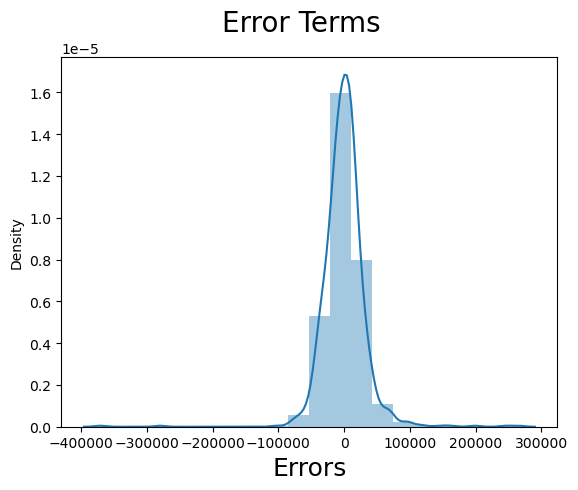

In [151]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Evaluate R2 of Train model

In [152]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.83

In [153]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1114742487771.479
1091814385.6723595
33042.614691824245


In [154]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

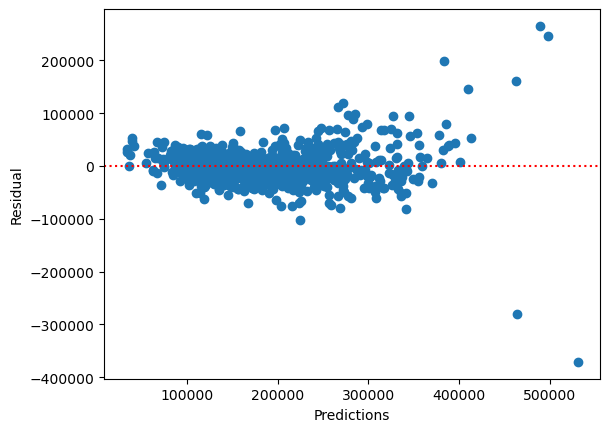

In [155]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

# Prediction and Evalution on Test Data

In [156]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,1.501060,0.381373,-0.154845,0.212191,-0.789230,-0.124502,-0.498789,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.278464,0.306009,-0.329996,1.023633,-0.393502,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,

In [157]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.0,439.0,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008

In [158]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [159]:
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', 'BsmtFinSF1', 'GrLivArea', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_RL', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_Stucco', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_VinylSd'], dtype='object')

In [160]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [161]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()

In [162]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 24 May 2023   Prob (F-statistic):          8.33e-159
Time:                        21:27:42   Log-Likelihood:                -5154.7
No. Observations:                 439   AIC:                         1.036e+04
Df Residuals:                     415   BIC:                         1.046e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.642e+05   4675.602     35.116      0.000    1.55e+05    1.73e+05
OverallQual           2.811e+04   2524.582     11.133      0.000    2.31e+04    3.31e+04
BsmtExposure          6606.9637   1812.434      3.645      0.000    3044.268    1.02e+04
BsmtFinSF1            1.356e+04   1824.095      7.434      0.000    9975.044    1.71e+04
GrLivArea             3.127e+04   2305.697     13.561      0.000    2.67e+04    3.58e+04
MSSubClass_90        -2.406e+04   1.01e+04     -2.372      0.018    -4.4e+04   -4123.821
MSSubClass_120       -2.028e+04   7501.970     -2.703      0.007    -3.5e+04   -5531.166
MSSubClass_160       -2.921e+04   8416.666     -3.470      0.001   -4.58e+04   -1.27e+04
MSSubClass_190       -6142.8064   1.49e+04     -0.413      0.680   -3.54e+04    2.31e+04
MSZoning_RL           1.186e+04   4528.223      2.618      0.009    2955.341    2.08e+04
LotConfig_CulDSac     1.318e+04   6318.461      2.087      0.038     764.236    2.56e+04
Neighborhood_ClearCr -4389.8270   1.17e+04     -0.375      0.708   -2.74e+04    1.86e+04
Neighborhood_Crawfor  1.789e+04   7723.101      2.316      0.021    2704.824    3.31e+04
Neighborhood_Edwards -6973.6746   6935.254     -1.006      0.315   -2.06e+04    6658.931
Neighborhood_NoRidge  3.217e+04   1.35e+04      2.391      0.017    5718.986    5.86e+04
Neighborhood_NridgHt  7.773e+04   8528.494      9.114      0.000     6.1e+04    9.45e+04
Neighborhood_Somerst  2.798e+04   7448.438      3.756      0.000    1.33e+04    4.26e+04
Neighborhood_StoneBr  8.365e+04   1.01e+04      8.274      0.000    6.38e+04    1.04e+05
Neighborhood_Veenker -1.366e-11   2.81e-12     -4.860      0.000   -1.92e-11   -8.14e-12
HouseStyle_2.5Fin    -1.429e+04   1.68e+04     -0.853      0.394   -4.72e+04    1.86e+04
HouseStyle_2.5Unf    -3.123e+04   1.92e+04     -1.629      0.104   -6.89e+04    6452.332
Exterior1st_Stucco     883.7540   1.45e+04      0.061      0.951   -2.76e+04    2.93e+04
Exterior2nd_BrkFace   3954.4278   1.08e+04      0.365      0.715   -1.73e+04    2.52e+04
Exterior2nd_CmentBd   1.557e+04   7476.146      2.083      0.038     876.755    3.03e+04
Exterior2nd_VinylSd   7343.0206   3668.783      2.001      0.046     131.306    1.46e+04
==============================================================================
Omnibus:                       74.209   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              506.906
Skew:                           0.496   Prob(JB):                    8.45e-111
Kurtosis:                       8.170   Cond. No.                     3.20e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest 

In [163]:
# Making predictions
y_pred = lm.predict(X_test_new)

# calculate r2 score of Test model

In [164]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.82

In [165]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

500664218745.54913
1140465190.7643487
33770.774210319025


In [166]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [167]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.72
8,MSZoning_RL,2.16
3,GrLivArea,2.05
23,Exterior2nd_VinylSd,1.82
14,Neighborhood_NridgHt,1.43
1,BsmtExposure,1.33
15,Neighborhood_Somerst,1.33
5,MSSubClass_120,1.32
13,Neighborhood_NoRidge,1.28
2,BsmtFinSF1,1.26


Text(0, 0.5, 'y_pred')

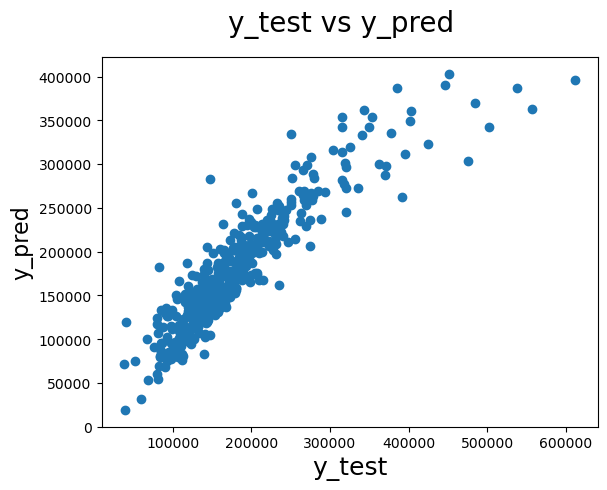

In [168]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [169]:
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', 'BsmtFinSF1', 'GrLivArea', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_RL', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_Stucco', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_VinylSd'], dtype='object')

In [170]:
#final dataframe 
final_df = house_data[['OverallQual', 'BsmtExposure', 'BsmtFinSF1', 'GrLivArea', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_RL', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_Stucco', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_VinylSd']]
final_df.head()

,OverallQual,BsmtExposure,BsmtFinSF1,GrLivArea,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_190,MSZoning_RL,LotConfig_CulDSac,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,HouseStyle_2.5Fin,HouseStyle_2.5Unf,Exterior1st_Stucco,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_VinylSd
0,7,1,706,1710,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,6,4,978,1262,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,7,2,486,1786,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7,1,216,1717,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,8,3,655,2198,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


Final evalution
No of Variables = 24 i.e. 'OverallQual', 'BsmtExposure', 'BsmtFinSF1', 'GrLivArea', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_RL', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_Stucco', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_VinylSd'

VIF < 5

p-value < 0.05

r2 score for Train Data set model = 0.83
r2 score for Test Data set model = 0.82

In [171]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8253263000808033
0.8228192078470605
1114742487771.479
500664218745.54913
1091814385.6723595
1140465190.7643487


# Ridge Regression

In [172]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [173]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 8.0}


In [174]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 28365.03429565  10696.44388618   8326.44963583  27532.86483397
 -14176.25572286  -7477.46639659 -19391.66755418 -14591.97722351
  16650.89702031  10529.67849669   9670.02246278  17069.15008026
 -14548.11927861  43087.03946316  45088.22724872  30427.3610189
  15660.7108765   13863.5876865   -7193.5484336  -10225.00983186
 -14004.48441122  15618.84701329  15520.05503292  12959.56995153]


In [175]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.819667019186972
0.817220930695221
1150859206347.3457
516483411235.26025
1127188253.0336392
1176499797.8024151


# Lasso

In [176]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [177]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [178]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [179]:
lasso.coef_

array([ 26556.82146241,  10807.97091081,   7954.37584668,  27048.82508068,
       -15250.80294276,  -9277.89722488, -23801.96750009, -16512.28147711,
        16915.19550122,  10057.78310029,  11081.32150667,  21609.0337098 ,
       -14662.36575682,  57794.79737303,  56500.92675875,  38550.13214369,
        25881.57611814,  19394.22896997,     -0.        ,  -7868.79623318,
       -14388.60542948,  19397.76642822,  16698.64878159,  12845.82095586])

In [180]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8234345720168141
0.8203580859135794
1126815224818.9785
507618672866.06274
1103638809.8129075
1156306771.904471


In [181]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.253263e-01,8.196670e-01,8.234346e-01
1,R2 Score (Test),8.228192e-01,8.172209e-01,8.203581e-01
2,RSS (Train),1.114742e+12,1.150859e+12,1.126815e+12
3,RSS (Test),5.006642e+11,5.164834e+11,5.076187e+11
4,MSE (Train),3.304261e+04,3.357362e+04,3.322106e+04
5,MSE (Test),3.377077e+04,3.430014e+04,3.400451e+04


In [182]:
# Lets observe the changes in the coefficients after regularization

In [183]:
betas = pd.DataFrame(index=X.columns)

In [184]:
betas.rows = X.columns

In [185]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [186]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,25161.495926,28365.034296,26556.821462
BsmtExposure,10633.537775,10696.443886,10807.970911
BsmtFinSF1,7758.980719,8326.449636,7954.375847
GrLivArea,27499.336914,27532.864834,27048.825081
MSSubClass_90,-18355.650287,-14176.255723,-15250.802943
MSSubClass_120,-14011.253318,-7477.466397,-9277.897225
MSSubClass_160,-28262.144004,-19391.667554,-23801.967500
MSSubClass_190,-20043.755415,-14591.977224,-16512.281477
MSZoning_RL,15771.466557,16650.897020,16915.195501
LotConfig_CulDSac,10467.394741,10529.678497,10057.783100


# Que1: Double the values of Alpha for lasso & Ridge

In [187]:
#earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 29923.03206174  10667.88317731   8608.95354405  27567.69626943
 -11738.4357549   -5041.90016535 -15092.01798752 -11444.13432236
  16240.85390661   9823.25346046   6783.54592342  12427.27007775
 -13372.43816147  33308.68392245  36355.00844405  23984.78914836
   9142.38247929   8949.7830254   -4129.39161937  -7078.15035373
 -10990.96215565  11094.20816795  12565.38720845  12588.69952075]
0.813097574224438
0.8124801695348787


In [188]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 27709.72616469  10960.82541908   8020.15219047  27134.30107275
 -12577.92740428  -4373.93198577 -19543.80296965 -12290.61611913
  17708.7975327    9588.01859708   4488.86484088  16035.90328857
 -13950.17044094  52748.05820852  51073.72463489  34779.74460084
  12738.47533498   8800.41282825     -0.             -0.
  -9645.30808494  13002.35699092  13817.19423139  11835.91193788]
0.8192516166201307
0.8139710057919156


___As alpha value increased more feautrues removed from model. But r2score is also dropped by 1% in both test and train data___

# Que3: Drop the Top 5 features and rebuild lasso
___Top 5 features are Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                               , 'Neighborhood_Veenker'

In [189]:
#Drop 5 features
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                               , 'Neighborhood_Veenker'], axis=1)

In [190]:
#Drop 5 features
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                               , 'Neighborhood_Veenker'], axis=1)

In [191]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [192]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [193]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [194]:
lasso.coef_

array([ 36803.11235095,  10154.18454391,   9147.42256732,  27829.46298792,
        -3568.92074989,     -0.        ,  -3428.59919423,     -0.        ,
        15911.21882523,   5278.52020737,      0.        ,      0.        ,
       -10864.55265145,     -0.        ,     -0.        ,   -560.07901417,
            0.        ,   4653.39211641,  12058.09854828])

In [195]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.7712539896952942
0.7862663678157147


# ___After dropping the top 5 features model r2 score is  i.e. 77% for Train and 78% for Test.___

In [196]:
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', 'BsmtFinSF1', 'GrLivArea', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_190', 'MSZoning_RL', 'LotConfig_CulDSac', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Exterior1st_Stucco', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd', 'Exterior2nd_VinylSd'], dtype='object')

___Next top 5 features after drooping 5 main predictors Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr' , 'Neighborhood_Veenker'